## Import

In [318]:
from matplotlib import pyplot as plt

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam, Adamax

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta
from tensorflow.keras import layers

from keras.layers import Conv1D, MaxPooling1D


from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score

import sklearn.metrics as metrics

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [319]:
data = pd.read_csv("cocacola.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...,...
15091,2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
15092,2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
15093,2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900


In [320]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

In [321]:
data.index = data.pop('Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200
...,...,...,...,...,...,...
2021-12-13,56.980000,57.930000,56.959999,57.759998,57.759998,31362800
2021-12-14,57.400002,58.169998,57.400002,57.799999,57.799999,24806600
2021-12-15,57.930000,58.250000,57.650002,58.060001,58.060001,24923800


In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15096 entries, 1962-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       15096 non-null  float64
 1   High       15096 non-null  float64
 2   Low        15096 non-null  float64
 3   Close      15096 non-null  float64
 4   Adj Close  15096 non-null  float64
 5   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 825.6 KB


In [323]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,1.509600e+04
mean,16.056202,16.188428,15.921876,16.060734,11.367487,9.032904e+06
std,16.939301,17.064336,16.811753,16.941712,14.253637,7.935744e+06
min,0.192708,0.193359,0.182292,0.192057,0.037855,7.680000e+04
25%,0.860677,0.869792,0.854167,0.860352,0.242312,2.812800e+06
50%,9.328125,9.398438,9.218750,9.351562,4.642848,7.585200e+06
75%,28.875000,29.167500,28.563125,28.901562,17.251080,1.291275e+07
max,59.810001,60.130001,59.619999,60.130001,58.650002,1.241690e+08


In [324]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [325]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

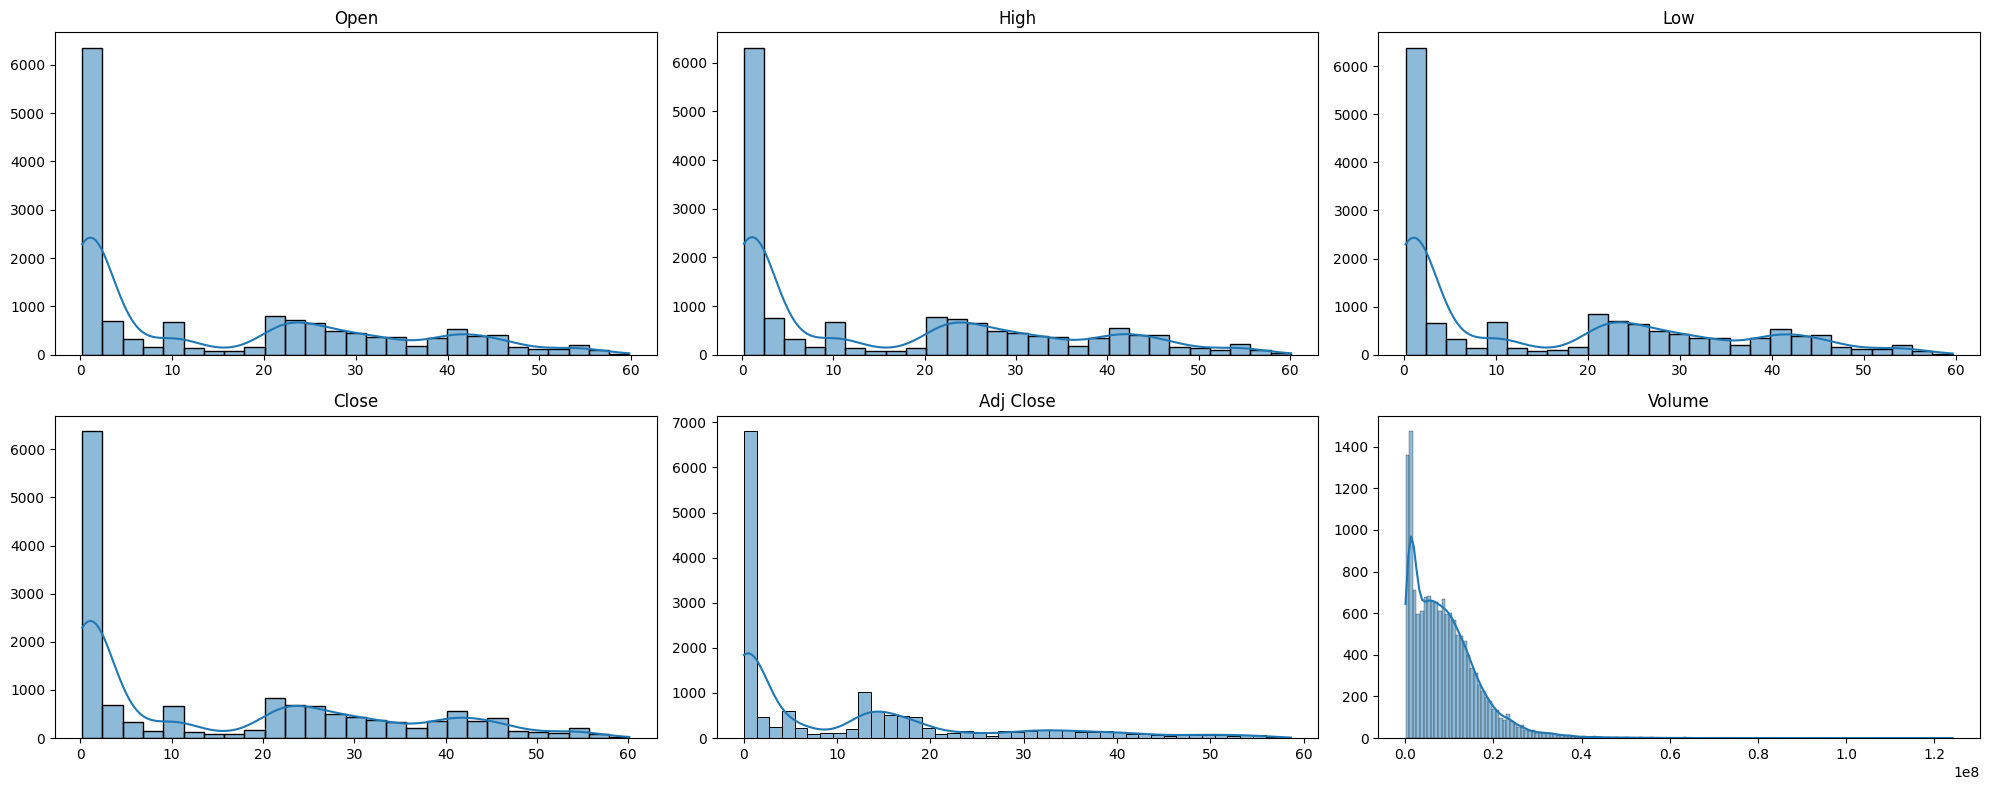

In [326]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

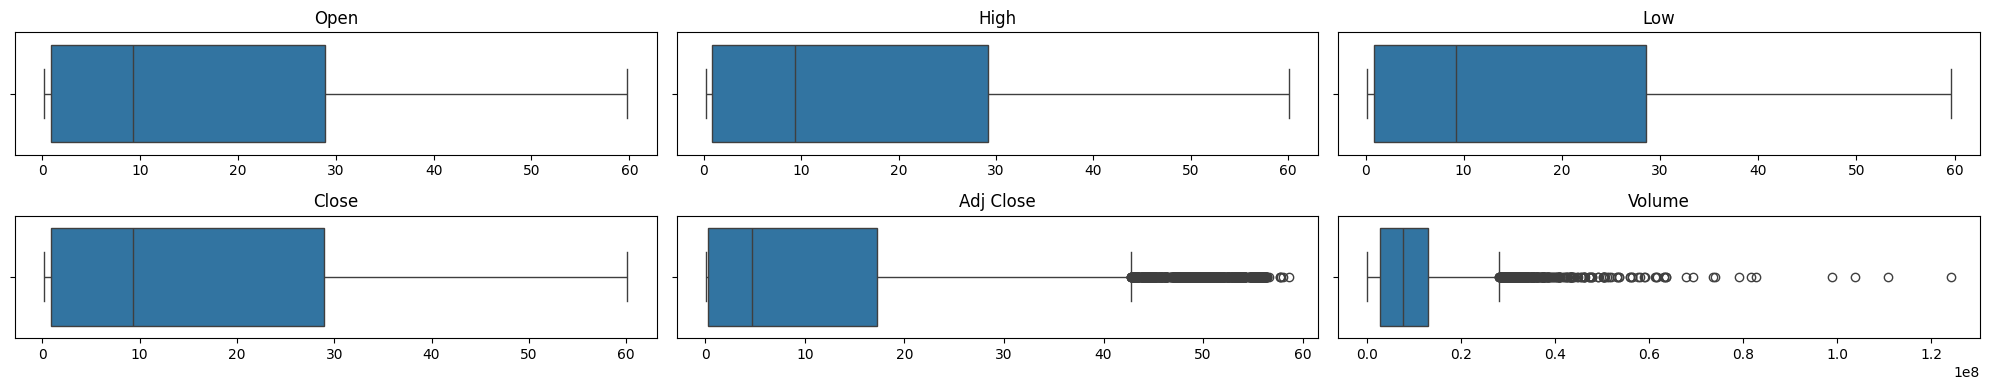

In [327]:
fig, axes = plt.subplots(2, 3, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [328]:
def plot(data, columns, x):
    fig, axes = plt.subplots(3, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

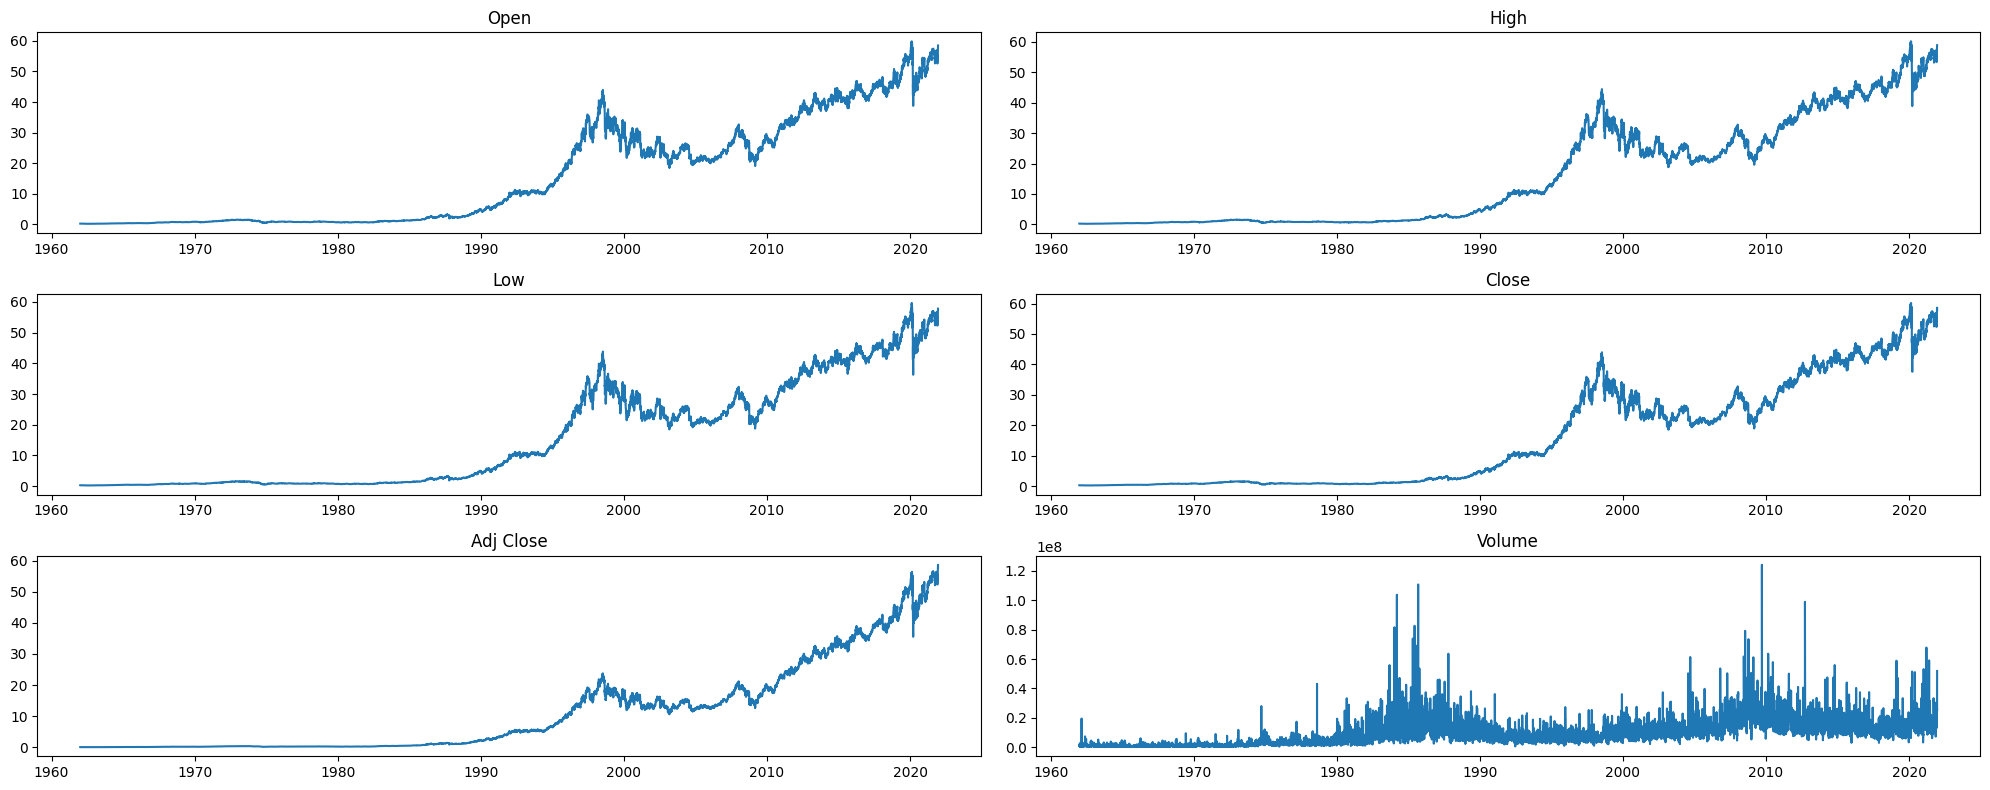

In [329]:
plot(data, columns, 'Date')

In [330]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


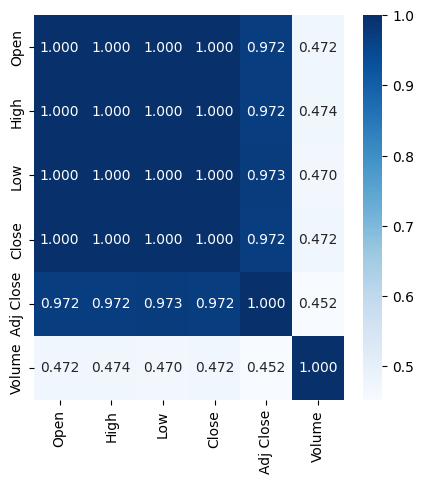

In [331]:
df_corr = data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

Podela podataka na train, val i test skup (70%, 20%, 10%).

In [332]:
data = data.drop(columns=['High', 'Low', 'Open', 'Adj Close', 'Volume'])

In [333]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (10567, 1) 
Validation size :  (3019, 1) 
Test Size :  (1510, 1)


,Close
Date,
1962-01-02,0.263021
1962-01-03,0.257161
1962-01-04,0.259115
1962-01-05,0.253255
1962-01-08,0.250651
...,...
2003-12-16,25.340000
2003-12-17,25.084999
2003-12-18,24.969999


In [334]:
train_df.columns

Index(['Close'], dtype='object')

Normalizacija podataka

In [335]:
scaler = MinMaxScaler()

col = ['Close']

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


In [336]:
target = ['Close']

def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size][target])
    return np.array(X), np.array(Y)

In [337]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 10, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 10, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 10, 1)

In [338]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (10557, 10, 1) (10557, 1) 
 Val size :  (3009, 10, 1) (3009, 1) 
 Test Size :  (1500, 10, 1) (10557, 1)


pomocne funkcije

In [339]:
results = pd.DataFrame(columns=['Model', 'mean abs', 'R2', 'mean sqrd'])


In [340]:

def print_result(model, model_name, X_test, y_test, end=-1):

    y_pred = model.predict(X_test)

    mean_abs = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mean_sqrd = metrics.mean_squared_error(y_test, y_pred)

    results.loc[len(results)] = [model_name, mean_abs, r2, mean_sqrd]

    # fig, axs = plt.subplots(4, 2, figsize=(12, 12)) 

    # for k in range(0,8):
    #     i = k // 2 
    #     j = k % 2   
        
    #     axs[i, j].plot(y_test[:, k], label='True')   
    #     axs[i, j].plot(y_pred[:, k], label='Predicted') 
    #     axs[i, j].set_xlabel(data.columns[k])  
    #     axs[i, j].legend()

    plt.plot(y_test, label='True')   
    plt.plot(y_pred, label='Predicted') 
    plt.tight_layout()  
    plt.show()


    display(results)



In [341]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)


Modeli


In [342]:
history = History()
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's Training & Validation loss across epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# custom loss

In [344]:

def custom_loss(y_true, y_pred):
    # Calculate absolute difference between true and predicted values
    error = tf.abs(y_true - y_pred)
    
    # Define a punishment factor to increase punishment for larger errors
    punishment_factor = 2.0
    
    # Penalize larger errors more heavily
    weighted_error = tf.where(error < 1, error, punishment_factor * error)
    
    # Return the mean of the weighted error
    return tf.reduce_mean(weighted_error)

In [417]:
import tensorflow.keras.backend as K

def custom_loss_1(y_true, y_pred):
    #extract the "next day's price" of tensor
    y_true_next = y_true[1:]
    y_pred_next = y_pred[1:]
    #extract the "today's price" of tensor
    y_true_tdy = y_true[:-1]
    y_pred_tdy = y_pred[:-1]
    #substract to get up/down movement of the two tensors
    y_true_diff = tf.subtract(y_true_next, y_true_tdy)
    y_pred_diff = tf.subtract(y_pred_next, y_pred_tdy)
    #create a standard tensor with zero value for comparison
    standard = tf.zeros_like(y_pred_diff)
    #compare with the standard; if true, UP; else DOWN
    y_true_move = tf.greater_equal(y_true_diff, standard)
    y_pred_move = tf.greater_equal(y_pred_diff, standard)

    #find indices where the directions are not the same
    condition = tf.not_equal(y_true_move, y_pred_move)
    indices = tf.where(condition)
    ones = tf.ones_like(indices)
    indices = tf.add(indices, ones)

    updates = K.cast(tf.ones_like(indices), dtype='float32')
    alpha = 1000
    direction_loss = tf.Variable(tf.ones_like(y_pred), dtype='float32')
    direction_loss = tf.tensor_scatter_nd_update(direction_loss, indices[:,tf.newaxis], alpha*updates)
    custom_loss = K.mean(tf.multiply(K.square(y_true - y_pred), direction_loss), axis=-1)

    return custom_loss

# SimpleRNN

### Adam

#### simple RNN

In [345]:

model_srnn = Sequential()
model_srnn.add(SimpleRNN(units = 20, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_srnn.add(Dense(20, activation='relu'))
model_srnn.add(Dense(units = 1))
model_srnn.compile(optimizer=Adam(learning_rate=0.001), loss = "mean_squared_error")
history = model_srnn.fit(X_train,Y_train, validation_data=(X_val, Y_val), epochs = 50, batch_size = 32, callbacks=[ history, early_stopping] )


Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0040 - val_loss: 8.2579e-05
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2435e-05 - val_loss: 8.0874e-05
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3761e-05 - val_loss: 6.7308e-05
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6749e-05 - val_loss: 7.7978e-05
Epoch 5/50
217/330 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2863e-05

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4119e-05 - val_loss: 6.4834e-05
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0037e-05 - val_loss: 6.4042e-05
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6226e-05 - val_loss: 6.8043e-05
Epoch 8/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3579e-05 - val_loss: 1.1198e-04
Epoch 9/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7655e-05 - val_loss: 8.1617e-05
Epoch 10/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7777e-05 - val_loss: 1.1323e-04
Epoch 11/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6358e-05 - val_loss: 1.0360e-04
Epoch 12/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0826e-05 - val_loss: 2.9193e-04
Epoch 13/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8584e-05 - val_loss: 6.2515e-05
Epoch 14/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2416e-05 - val_loss: 6.8758e-05
Epoch 15/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.773

In [346]:
model_srnn.evaluate(X_test,Y_test)
model_srnn.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1974e-04


Model: "sequential_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_39 (SimpleRNN)       │ (None, 20)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,645 (10.34 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,764 (6.89 KB)

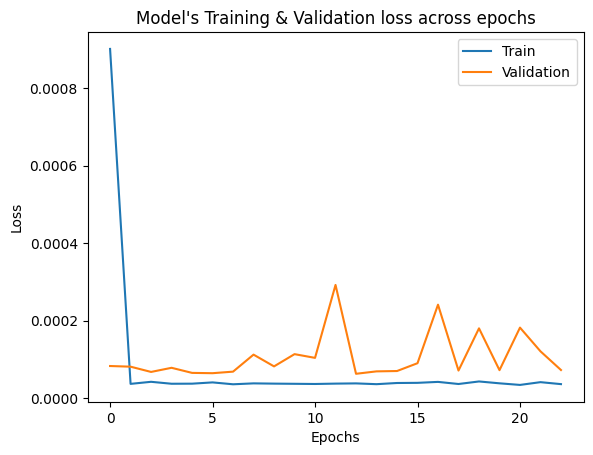

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


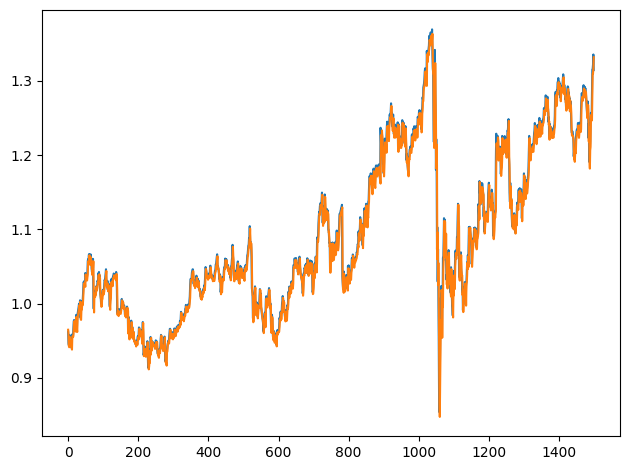

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196


In [347]:

plotloss(history)
print_result(model_srnn, 'SimpleRNN 20 units, Adam', X_test, Y_test, 200)


#### 50 units and early stopping

In [348]:
model = Sequential()
# adding RNN layers and dropout regularization 
model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))
# adding the output layer
model.add(Dense(units = 1, activation='sigmoid')) 
# compiling RNN
model.compile(optimizer = Adam(learning_rate=0.001), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs = 50, batch_size = 32,
                    callbacks=[ history, early_stopping]
                    )

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0198 - mean_absolute_error: 0.0738 - root_mean_squared_error: 0.1227 - val_loss: 0.0020 - val_mean_absolute_error: 0.0352 - val_root_mean_squared_error: 0.0437
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 4.7754e-04 - mean_absolute_error: 0.0117 - root_mean_squared_error: 0.0218 - val_loss: 0.0051 - val_mean_absolute_error: 0.0651 - val_root_mean_squared_error: 0.0706
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 3.4995e-04 - mean_absolute_error: 0.0091 - root_mean_squared_error: 0.0187 - val_loss: 0.0021 - val_mean_absolute_error: 0.0381 - val_root_mean_squared_error: 0.0454
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.3551e-04 - mean_absolute_error: 0.0077 - root_mean_squared_error: 0.0153 - val_loss: 0.0035 - val_mean_absolute_error: 0.0524 - val_root_mean_squared_error: 0.0587
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.6516e-04 - mean_absolute_error: 0.0085 - roo

In [349]:
model.evaluate(X_test,Y_test)
model.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0209 - mean_absolute_error: 0.1326 - root_mean_squared_error: 0.1411


Model: "sequential_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_40 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_41 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_42 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_43 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,405 (208.62 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,604 (139.08 KB)

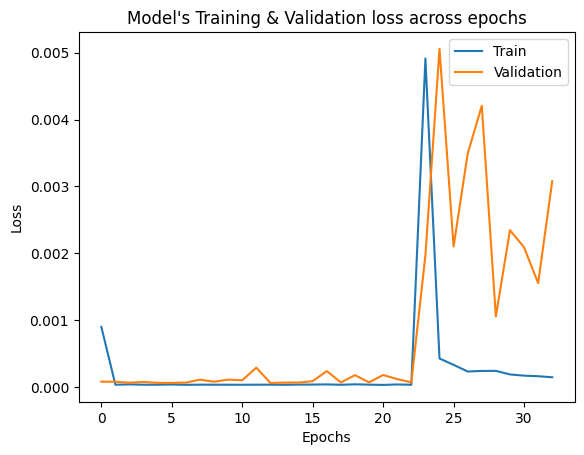

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


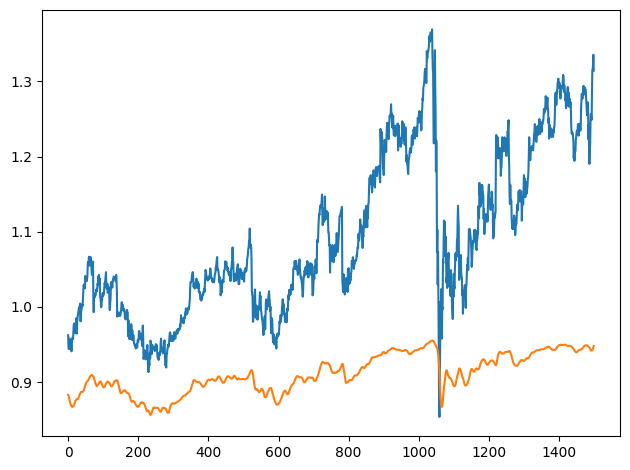

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794


In [350]:

plotloss(history)
print_result(model, 'SimpleRNN 4 units 50, Dropout, Adam 0.001', X_test, Y_test, 200)

### Convolution

Epoch 1/200


330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0870 - val_loss: 0.0443
Epoch 2/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0041 - val_loss: 7.3055e-04
Epoch 3/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014 - val_loss: 4.5935e-04
Epoch 4/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.4180e-04 - val_loss: 0.0016
Epoch 6/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.7047e-04 - val_loss: 7.8627e-04
Epoch 7/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.4246e-04 - val_loss: 0.0014
Epoch 8/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5429e-04 - val_loss: 9.4891e-04
Epoch 9/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8966e-04 - val_loss: 6.0721e-04
Epoch 10/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.5706e-04 - val_loss: 9.5500e-04


Model: "sequential_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_110 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_44 (SimpleRNN)       │ (None, 20)             │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_209 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,193 (28.10 KB)

 Trainable params: 2,397 (9.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,796 (18.74 KB)

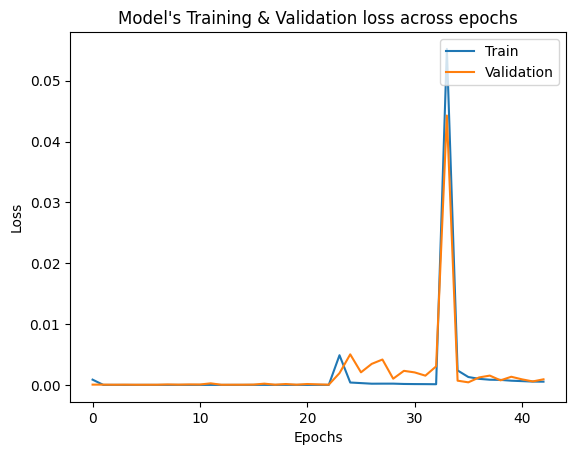

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


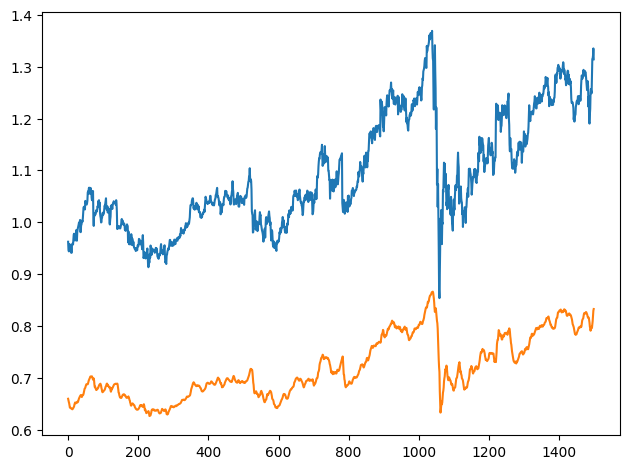

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767


In [351]:
model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))),
model_conv.add(MaxPooling1D(pool_size=2)),
model_conv.add(Dropout(0.2)),
model_conv.add(SimpleRNN(units = 20, activation = "relu", return_sequences = False, input_shape = (X_train.shape[1],1)))
model_conv.add(Dense(20, activation='relu'))
model_conv.add(Dense(1))
model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv RNN 20 dropout  Adam', X_test, Y_test)

### SGD

In [352]:

model = Sequential()
# adding RNN layers and dropout regularization 
model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))
# adding the output layer
model.add(Dense(units = 1, activation='sigmoid')) 
# compiling RNN
model.compile(optimizer = SGD(learning_rate=0.001,decay=1e-6,  momentum=0.9, nesterov=True), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs = 11, batch_size = 32,
                    callbacks=[ history, early_stopping]
                    )


Epoch 1/11


330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0447 - mean_absolute_error: 0.1669 - root_mean_squared_error: 0.2004 - val_loss: 0.0075 - val_mean_absolute_error: 0.0676 - val_root_mean_squared_error: 0.0854
Epoch 2/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0026 - mean_absolute_error: 0.0440 - root_mean_squared_error: 0.0512 - val_loss: 0.0075 - val_mean_absolute_error: 0.0681 - val_root_mean_squared_error: 0.0854
Epoch 3/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0373 - root_mean_squared_error: 0.0454 - val_loss: 0.0078 - val_mean_absolute_error: 0.0703 - val_root_mean_squared_error: 0.0868
Epoch 4/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0018 - mean_absolute_error: 0.0334 - root_mean_squared_error: 0.0418 - val_loss: 0.0078 - val_mean_absolute_error: 0.0693 - val_root_mean_squared_error: 0.0871
Epoch 5/11
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0015 - mean_absolute_error: 0.0304 - root_mean_squared_error

In [353]:
model.evaluate(X_test,Y_test)
model.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0582 - mean_absolute_error: 0.2318 - root_mean_squared_error: 0.2387


Model: "sequential_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_45 (SimpleRNN)       │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_46 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_47 (SimpleRNN)       │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_48 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

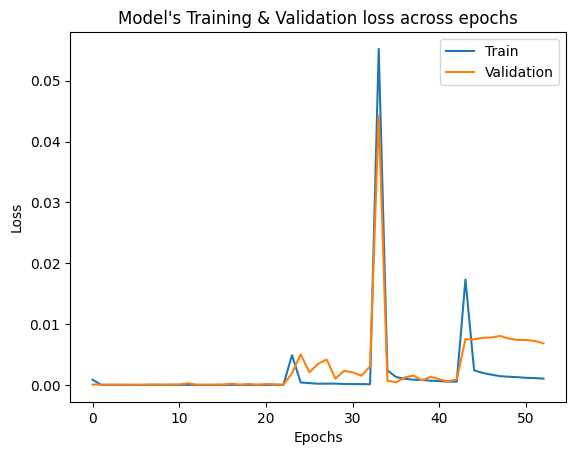

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


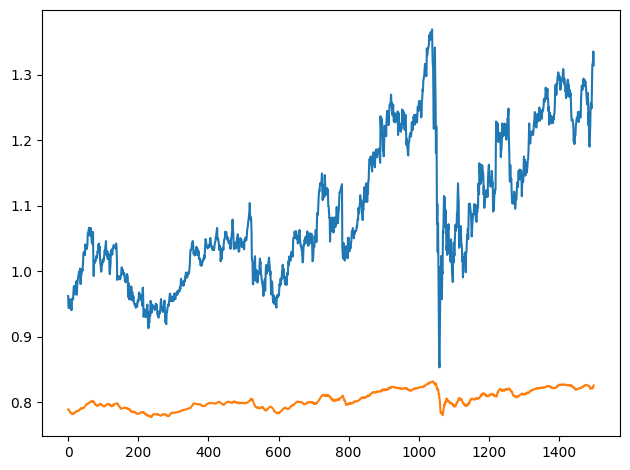

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707


In [354]:
plotloss(history)
print_result(model, 'SimpleRNN 4 units 50, Dropout, SGD 0.001', X_test, Y_test, 200)

# LSTM

### Adam

#### LSTM  64

In [355]:


model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])



Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0345 - val_loss: 3.5512e-04 - val_mean_absolute_error: 0.0153
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1272e-04 - mean_absolute_error: 0.0054 - val_loss: 1.7781e-04 - val_mean_absolute_error: 0.0099
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.5918e-05 - mean_absolute_error: 0.0048 - val_loss: 6.1839e-04 - val_mean_absolute_error: 0.0206
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1825e-04 - mean_absolute_error: 0.0059 - val_loss: 5.0993e-04 - val_mean_absolute_error: 0.0197
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1466e-04 - mean_absolute_error: 0.0056 - val_loss: 1.2342e-04 - val_mean_absolute_error: 0.0082
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.5576e-05 - mean_absolute_error: 0.0052 - val_loss: 5.7093e-04 - val_mean_absolute_error: 0.0215
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.2330e

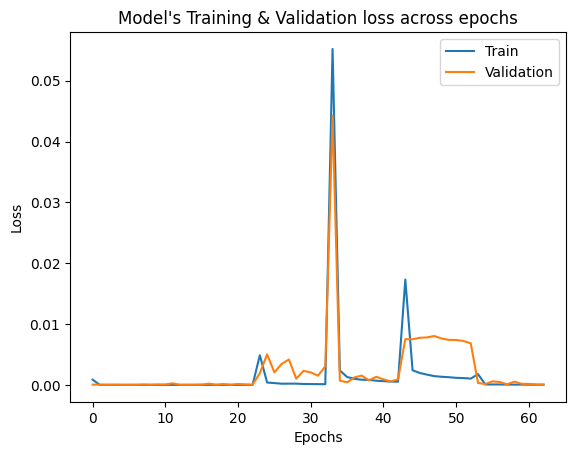

38/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


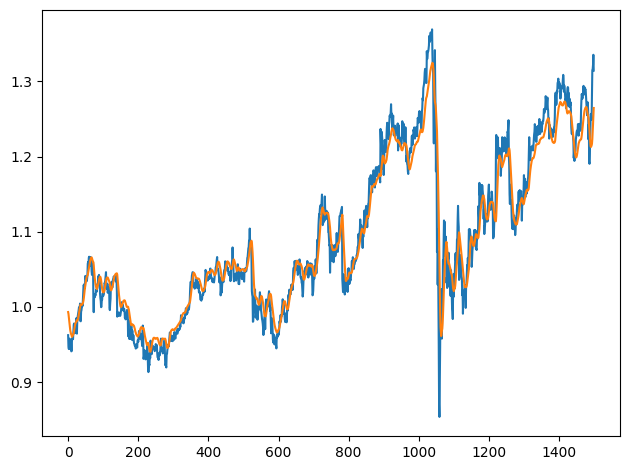

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678


In [356]:
plotloss(history)

print_result(model, 'LSTM 64, Adam 0.001', X_test, Y_test)


#### LSTM 2 layers 64,32

In [357]:
regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(64, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(32, return_sequences = False))
regressorLSTM.add(Dense(25, activation="relu"))
regressorLSTM.add(Dense(1,activation="relu"))
regressorLSTM.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
regressorLSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0101 - mean_absolute_error: 0.0404 - val_loss: 6.4967e-04 - val_mean_absolute_error: 0.0185
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.8561e-04 - mean_absolute_error: 0.0070 - val_loss: 3.1542e-04 - val_mean_absolute_error: 0.0134
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3808e-04 - mean_absolute_error: 0.0059 - val_loss: 2.2575e-04 - val_mean_absolute_error: 0.0112
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3319e-04 - mean_absolute_error: 0.0059 - val_loss: 4.2398e-04 - val_mean_absolute_error: 0.0169
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.4024e-04 - mean_absolute_error: 0.0063 - val_loss: 3.0321e-04 - val_mean_absolute_error: 0.0139
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3560e-04 - mean_absolute_error: 0.0061 - val_loss: 3.3840e-04 - val_mean_absolute_error: 0.0144
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.3881e

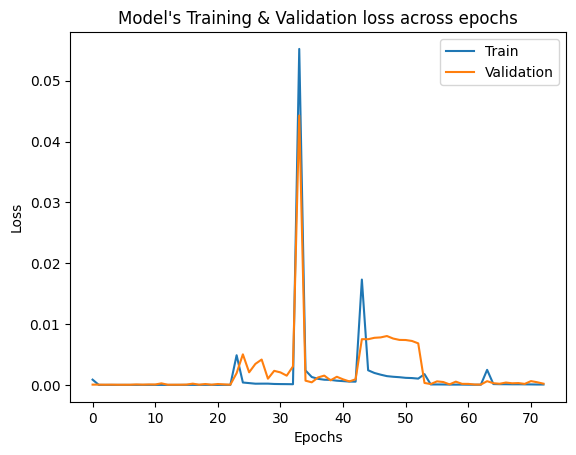

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


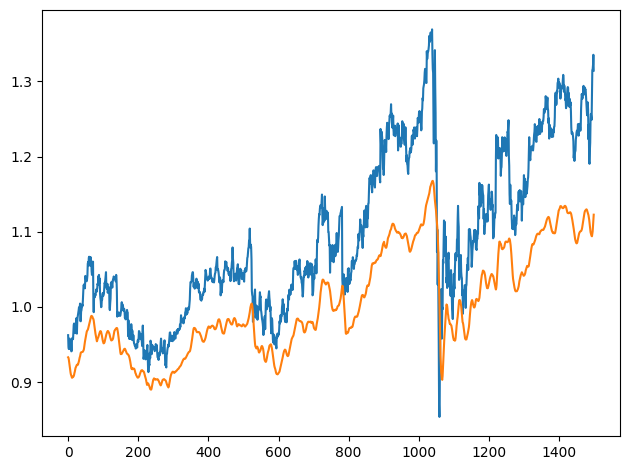

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491


In [358]:

plotloss(history)
print_result(regressorLSTM, 'LSTM 2 units 64,32  Adam 0.001', X_test, Y_test)


In [359]:

regressorLSTM.summary()
result = regressorLSTM.evaluate(X_test,Y_test)


Model: "sequential_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_126 (LSTM)                 │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_127 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,491 (353.48 KB)

 Trainable params: 30,163 (117.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,328 (235.66 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0658


#### LSTM 32,16

In [360]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(16, return_sequences = False))

regressorLSTM.add(Dense(1,activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error"])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])



Epoch 1/200


330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0454 - val_loss: 7.1643e-04 - val_mean_absolute_error: 0.0193
Epoch 2/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.7911e-04 - mean_absolute_error: 0.0068 - val_loss: 4.5693e-04 - val_mean_absolute_error: 0.0159
Epoch 3/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.6103e-04 - mean_absolute_error: 0.0066 - val_loss: 3.6606e-04 - val_mean_absolute_error: 0.0155
Epoch 4/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.5758e-04 - mean_absolute_error: 0.0061 - val_loss: 6.3165e-04 - val_mean_absolute_error: 0.0215
Epoch 5/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.5066e-04 - mean_absolute_error: 0.0063 - val_loss: 2.4982e-04 - val_mean_absolute_error: 0.0123
Epoch 6/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.3117e-04 - mean_absolute_error: 0.0058 - val_loss: 3.4075e-04 - val_mean_absolute_error: 0.0140
Epoch 7/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1

In [361]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0757


Model: "sequential_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_128 (LSTM)                 │ (None, 10, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_129 (LSTM)                 │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,517 (87.96 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,012 (58.64 KB)

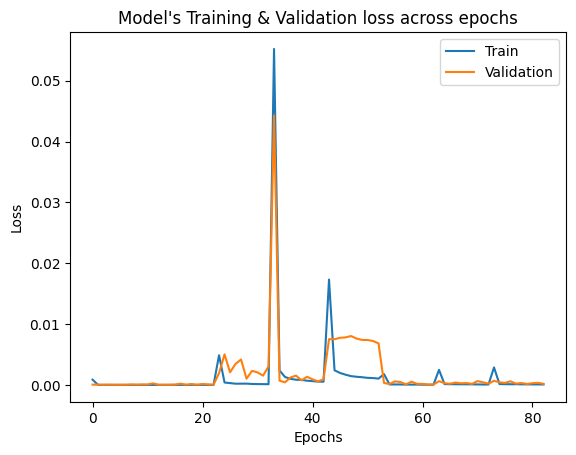

35/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


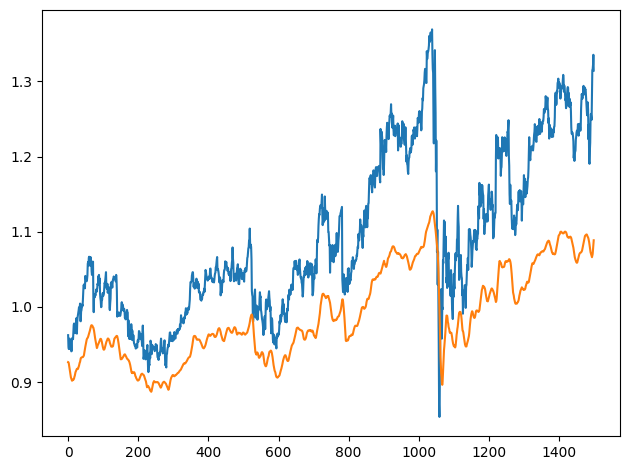

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174


In [362]:

plotloss(history)
print_result(regressorLSTM, 'LSTM 32, 16,   Adam 0.001', X_test, Y_test)



#### LSTM 4 layers 50 units dropout

In [363]:
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))
regressorLSTM.add(Dense(units=1,activation='relu'))
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])


Epoch 1/200


165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0863 - mean_absolute_error: 0.1662 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0865 - mean_absolute_error: 0.1662 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0899 - mean_absolute_error: 0.1709 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0867 - mean_absolute_error: 0.1661 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0870 - mean_absolute_error: 0.1665 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0874 - mean_absolute_error: 0.1665 - val_loss: 0.5143 - val_mean_absolute_error: 0.6900
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0858 - mean_absolute_error: 0.1657 -

In [364]:
result = regressorLSTM.evaluate(X_test,Y_test)
regressorLSTM.summary()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0614 - mean_absolute_error: 1.0273


Model: "sequential_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_130 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_131 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_132 (LSTM)                 │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_133 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

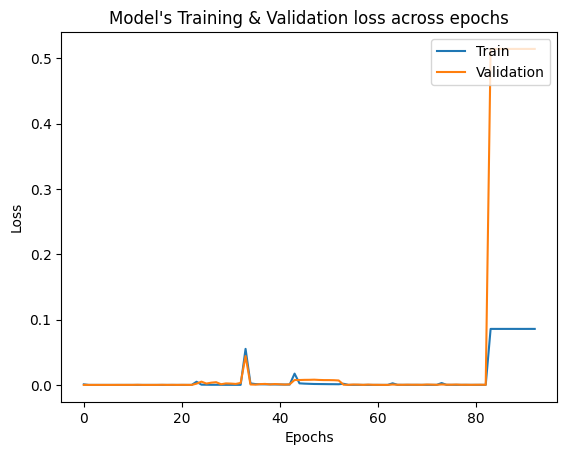

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


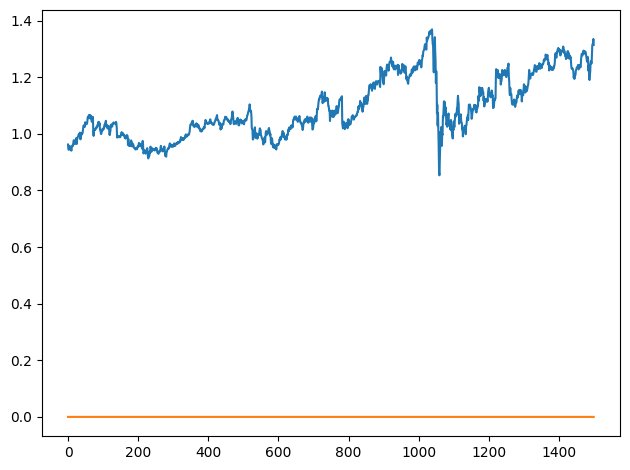

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249


In [365]:

plotloss(history)
print_result(regressorLSTM, 'LSTM 4 layers 50 units dropout', X_test, Y_test)


### Adamax

#### 64 units

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0488 - val_loss: 1.6470e-04 - val_mean_absolute_error: 0.0094
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0563e-04 - mean_absolute_error: 0.0045 - val_loss: 1.6975e-04 - val_mean_absolute_error: 0.0097
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0110e-04 - mean_absolute_error: 0.0047 - val_loss: 2.6157e-04 - val_mean_absolute_error: 0.0128
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0527e-04 - mean_absolute_error: 0.0052 - val_loss: 1.5126e-04 - val_mean_absolute_error: 0.0091
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.8577e-05 - mean_absolute_error: 0.0047 - val_loss: 1.5785e-04 - val_mean_absolute_error: 0.0093
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.1081e-05 - mean_absolute_error: 0.0047 - val_loss: 1.3888e-04 - val_mean_absolute_error: 0.0087
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.6970e

Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_134 (LSTM)                 │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,197 (235.15 KB)

 Trainable params: 20,065 (78.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,132 (156.77 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4929e-04 - mean_absolute_error: 0.0154


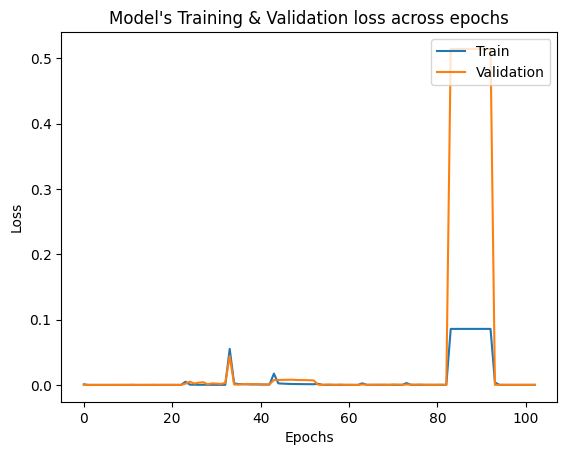

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


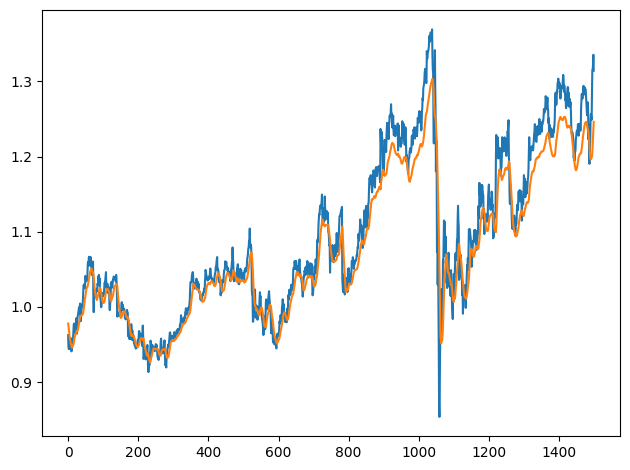

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953


In [366]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adamax(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 64, Dense 2 25,1,  Adamax', X_test, Y_test)

#### 2 layers 64,32

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0877 - mean_absolute_error: 0.1675 - val_loss: 0.5099 - val_mean_absolute_error: 0.6900
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0846 - mean_absolute_error: 0.1637 - val_loss: 0.5099 - val_mean_absolute_error: 0.6900
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0849 - mean_absolute_error: 0.1643 - val_loss: 0.5099 - val_mean_absolute_error: 0.6900
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0865 - mean_absolute_error: 0.1658 - val_loss: 0.5099 - val_mean_absolute_error: 0.6900
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0843 - mean_absolute_error: 0.1631 - val_loss: 0.5099 - val_mean_absolute_error: 0.6900
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0846 - mean_absolute_error: 0.1637 - val_loss: 0.5099 - val_mean_absolute_error: 0.6900
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0820 - mean_absolute_error: 0.1589 - val_loss: 0.

Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_135 (LSTM)                 │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_136 (LSTM)                 │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 25)             │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_222 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,491 (353.48 KB)

 Trainable params: 30,163 (117.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 60,328 (235.66 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0614 - mean_absolute_error: 1.0273


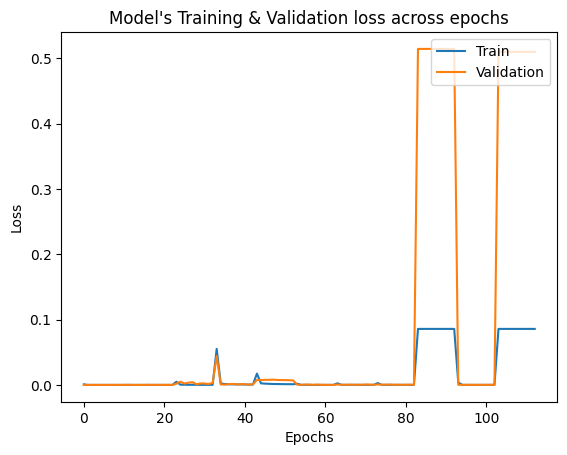

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


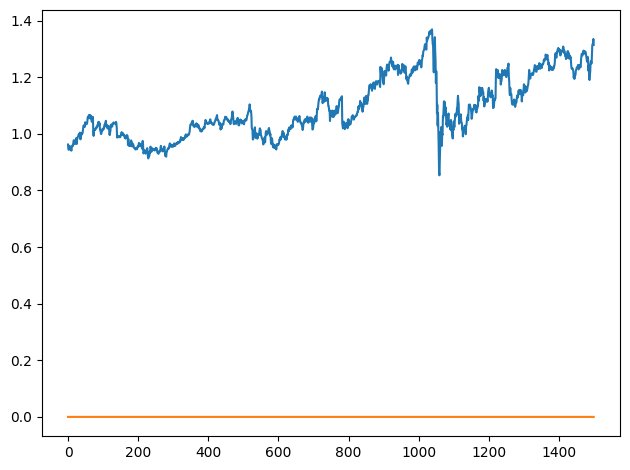

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [367]:
model = tf.keras.Sequential()
model.add(LSTM(64, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(LSTM(32, return_sequences = False))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adamax(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 64, 32  Adamax ', X_test, Y_test)

#### lstm 2 layers 64,32 units, dropout

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0084 - mean_absolute_error: 0.0438 - val_loss: 2.6126e-04 - val_mean_absolute_error: 0.0117
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.8914e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0014 - val_mean_absolute_error: 0.0331
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.8013e-04 - mean_absolute_error: 0.0120 - val_loss: 0.0010 - val_mean_absolute_error: 0.0277
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.6935e-04 - mean_absolute_error: 0.0118 - val_loss: 0.0015 - val_mean_absolute_error: 0.0331
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.6935e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0070 - val_mean_absolute_error: 0.0775
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.2204e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0011 - val_mean_absolute_error: 0.0273
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.3649e-04 - mean_abso

Model: "sequential_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_137 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_138 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_114 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8856e-04 - mean_absolute_error: 0.0152


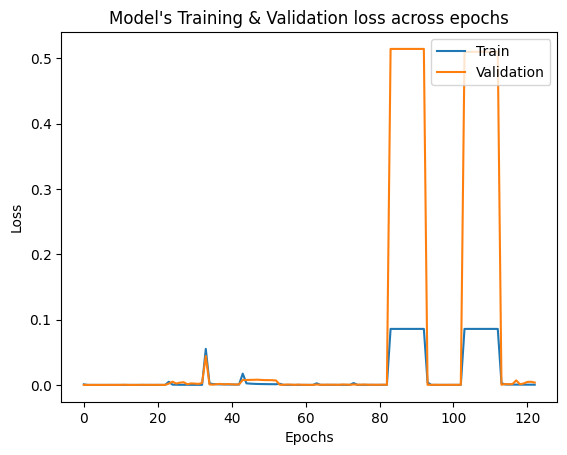

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


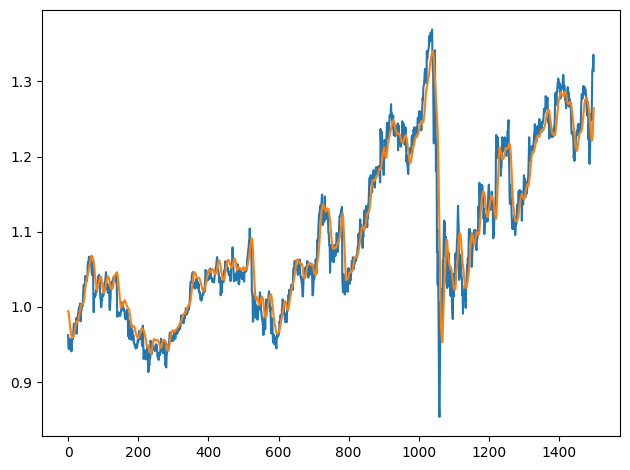

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [368]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adamax(learning_rate=0.001), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 2 laters 50, dropout  Adamax ', X_test, Y_test)

### Adagrad

#### LSTM 2 ;ayers 50units dropout

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0540 - mean_absolute_error: 0.1447 - val_loss: 0.1945 - val_mean_absolute_error: 0.4153
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0329 - mean_absolute_error: 0.1404 - val_loss: 0.1313 - val_mean_absolute_error: 0.3397
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0218 - mean_absolute_error: 0.1141 - val_loss: 0.0840 - val_mean_absolute_error: 0.2696
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0136 - mean_absolute_error: 0.0855 - val_loss: 0.0475 - val_mean_absolute_error: 0.1983
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0078 - mean_absolute_error: 0.0626 - val_loss: 0.0256 - val_mean_absolute_error: 0.1407
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0445 - val_loss: 0.0138 - val_mean_absolute_error: 0.0976
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0028 - mean_absolute_error: 0.0313 - val_loss: 

Model: "sequential_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_139 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_115 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_140 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_116 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_225 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,804 (249.24 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,903 (124.62 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4884 - mean_absolute_error: 0.6957


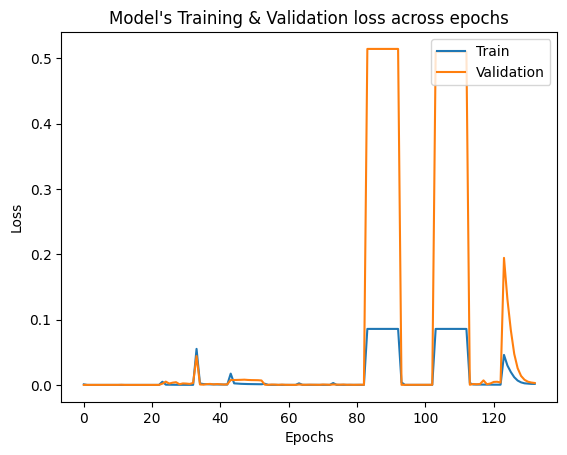

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


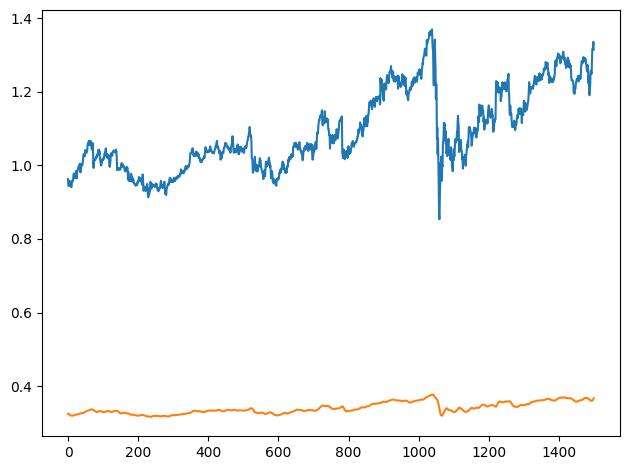

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [369]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adagrad(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 2 laters 50, dropout  Adagrad ', X_test, Y_test)

### Adadelta

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0836 - mean_absolute_error: 0.1623 - val_loss: 0.5084 - val_mean_absolute_error: 0.6886
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0858 - mean_absolute_error: 0.1622 - val_loss: 0.4770 - val_mean_absolute_error: 0.6657
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0796 - mean_absolute_error: 0.1530 - val_loss: 0.4412 - val_mean_absolute_error: 0.6392
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0725 - mean_absolute_error: 0.1450 - val_loss: 0.4109 - val_mean_absolute_error: 0.6161
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0664 - mean_absolute_error: 0.1406 - val_loss: 0.3858 - val_mean_absolute_error: 0.5963
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0616 - mean_absolute_error: 0.1382 - val_loss: 0.3640 - val_mean_absolute_error: 0.5787
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0604 - mean_absolute_error: 0.1404 - val_loss: 

Model: "sequential_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_141 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_117 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_142 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_118 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0614 - mean_absolute_error: 1.0273


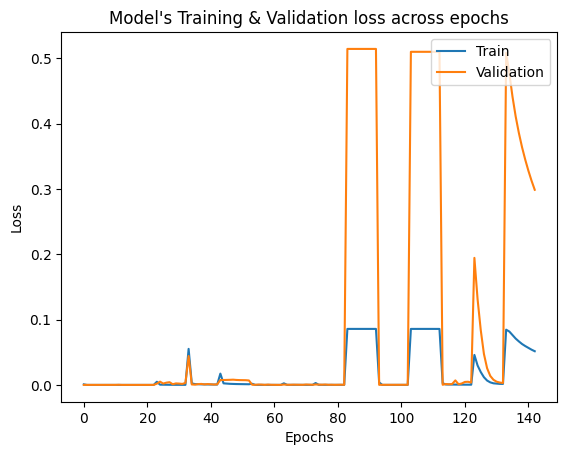

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


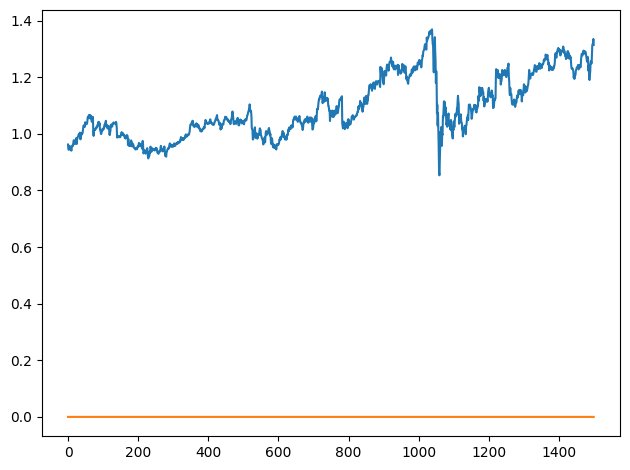

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [370]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss='mse',  optimizer=Adadelta(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 2 laters 50, dropout  Adadelta ', X_test, Y_test)

### Custom loss 

Epoch 1/50


330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0148 - val_mean_absolute_error: 0.0149
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - val_loss: 0.0109 - val_mean_absolute_error: 0.0110
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - val_loss: 0.0458 - val_mean_absolute_error: 0.0456
Epoch 7/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - val_l

Model: "sequential_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_143 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_119 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_144 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_120 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_230 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0223 - mean_absolute_error: 0.0223


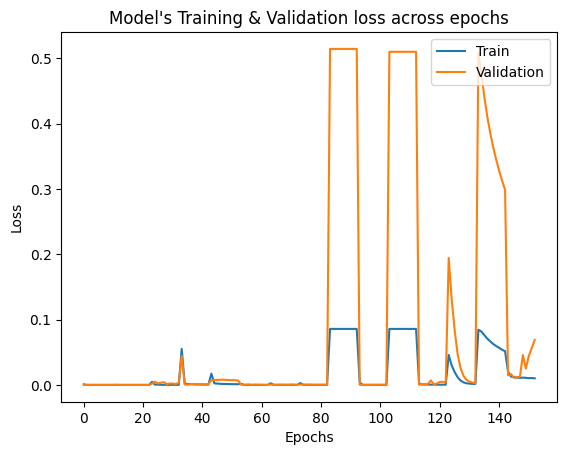

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


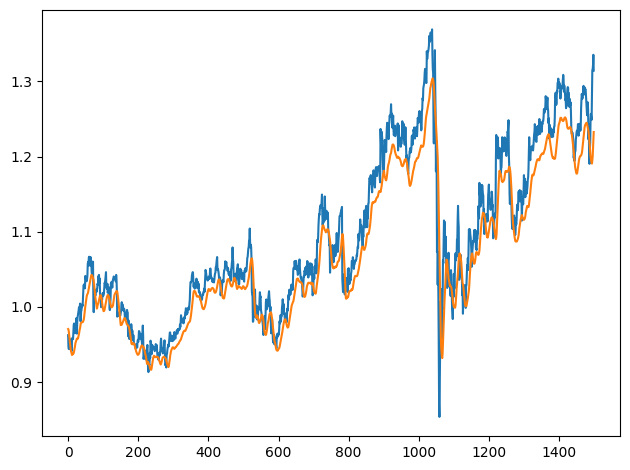

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [371]:
model = tf.keras.Sequential()
model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25, activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(loss=custom_loss,  optimizer=Adamax(), metrics=['mean_absolute_error'] )
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


model.summary()
result = model.evaluate(X_test,Y_test)

plotloss(history)
print_result(model, 'LSTM 2 laters 50, dropout  Adamax custom loss', X_test, Y_test)

In [418]:
# model = tf.keras.Sequential()
# model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences = False))
# model.add(Dropout(0.2))
# model.add(Dense(25, activation="relu"))
# model.add(Dense(1,activation="relu"))
# model.compile(loss=custom_loss_1,  optimizer=Adamax(), metrics=['mean_absolute_error'] )
# model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


# model.summary()
# result = model.evaluate(X_test,Y_test)

# plotloss(history)
# print_result(model, 'LSTM 2 laters 50, dropout  Adamax custom loss', X_test, Y_test)

Epoch 1/50


ValueError: Dimensions [0,2) of indices[shape=[?,1,2]] = [?,1] must match dimensions [0,2) of updates[shape=[?,2]] = [?,2]: Dimension 1 in both shapes must be equal, but are 1 and 2. Shapes are [?,1] and [?,2]. for '{{node compile_loss/custom_loss_1/TensorScatterUpdate}} = TensorScatterUpdate[T=DT_FLOAT, Tindices=DT_INT64](compile_loss/custom_loss_1/TensorScatterUpdate/ReadVariableOp, compile_loss/custom_loss_1/strided_slice_4, compile_loss/custom_loss_1/mul)' with input shapes: [?,1], [?,1,2], [?,2].

### Convolution

Epoch 1/200


330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0565 - val_loss: 3.1009e-04
Epoch 2/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.1723e-04 - val_loss: 2.8341e-04
Epoch 3/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.2172e-04 - val_loss: 2.5569e-04
Epoch 4/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.8043e-04 - val_loss: 4.3824e-04
Epoch 5/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.8934e-04 - val_loss: 2.8112e-04
Epoch 6/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.0664e-04 - val_loss: 4.8814e-04
Epoch 7/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.2940e-04 - val_loss: 3.1800e-04
Epoch 8/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.9079e-04 - val_loss: 9.4183e-04
Epoch 9/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.9306e-04 - val_loss: 5.4121e-04
Epoch 10/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.7001e-04 - val_loss: 3.4856e-04


Model: "sequential_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_17 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_121 (Dropout)           │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_145 (LSTM)                 │ (None, 4, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_146 (LSTM)                 │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_231 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,477 (185.46 KB)

 Trainable params: 15,825 (61.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,652 (123.64 KB)

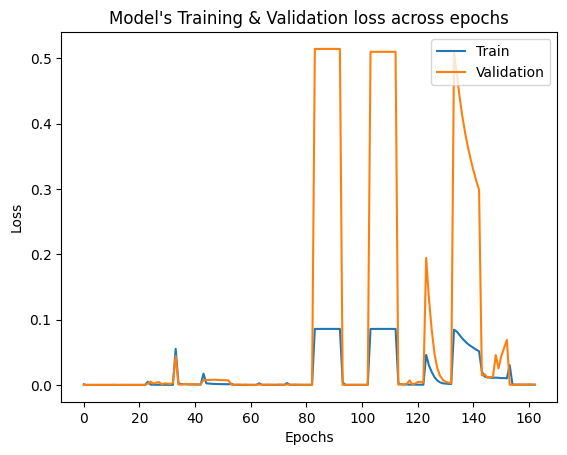

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


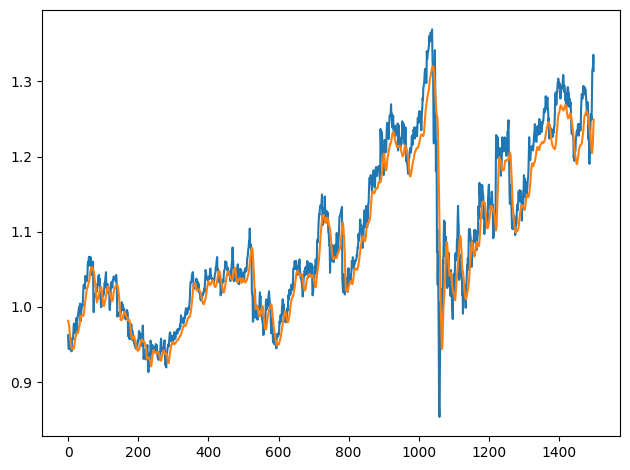

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [372]:

model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_conv.add(MaxPooling1D(pool_size=2))
model_conv.add(Dropout(0.2))
model_conv.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_conv.add(LSTM(16, return_sequences=False))
model_conv.add(Dense(1))

model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])


model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv LSTM 2 layers 32,26, dropout  Adam', X_test, Y_test)

### SGD

#### LSTM 2 layers 64,32 Dropout


In [373]:
# model = tf.keras.Sequential()
# model.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences = False))
# model.add(Dropout(0.2))
# model.add(Dense(25, activation="relu"))
# model.add(Dense(1,activation="relu"))
# model.compile(loss='mse',  optimizer=SGD(learning_rate=0.001), metrics=['mean_absolute_error'] )
# model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,  callbacks=[history, early_stopping])


# model.summary()
# result = model.evaluate(X_test,Y_test)

# plotloss(history)
# print_result(model, 'LSTM 64, 32, dropout SGD ', X_test, Y_test)

# GRU

### Adam

### 4 layers 50 units and dropout

In [374]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])



Epoch 1/200


165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0160 - mean_absolute_error: 0.0575 - val_loss: 3.5415e-04 - val_mean_absolute_error: 0.0146
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.1222e-04 - mean_absolute_error: 0.0073 - val_loss: 3.9114e-04 - val_mean_absolute_error: 0.0164
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.0227e-04 - mean_absolute_error: 0.0073 - val_loss: 2.9915e-04 - val_mean_absolute_error: 0.0131
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.9942e-04 - mean_absolute_error: 0.0075 - val_loss: 2.0562e-04 - val_mean_absolute_error: 0.0110
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.3450e-04 - mean_absolute_error: 0.0081 - val_loss: 2.0567e-04 - val_mean_absolute_error: 0.0111
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.8754e-04 - mean_absolute_error: 0.0078 - val_loss: 9.4179e-04 - val_mean_absolute_error: 0.0266
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step -

In [375]:
regressorGRU.summary()
result = regressorGRU.evaluate(X_test,Y_test)


Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_75 (GRU)                    │ (None, 10, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_122 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_76 (GRU)                    │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_77 (GRU)                    │ (None, 10, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_78 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_232 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,705 (631.66 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,804 (421.11 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - mean_absolute_error: 0.0407


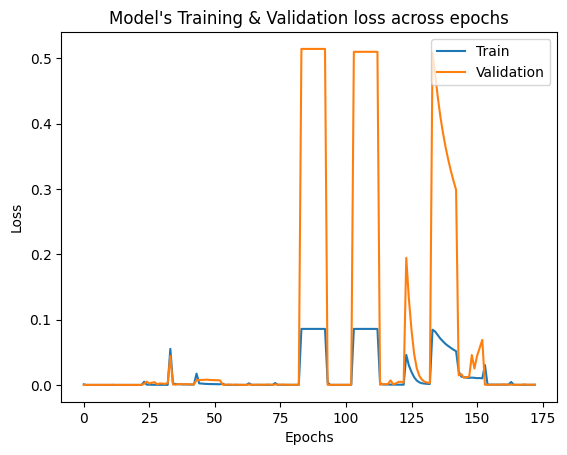

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


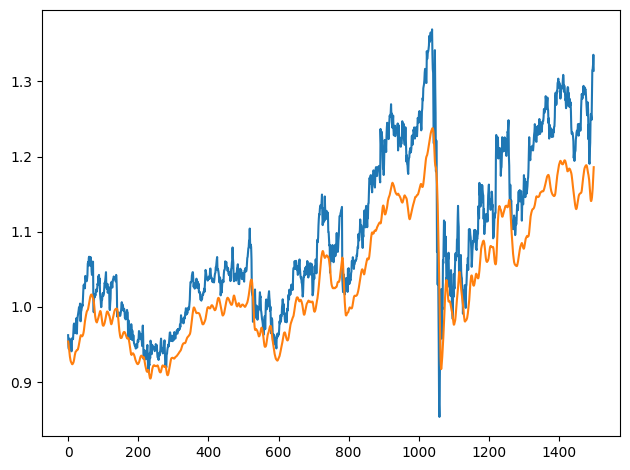

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [376]:

plotloss(history)

print_result(regressorGRU, 'GRU L 4 units 50, Adam 0.001', X_test, Y_test)


#### GRU 3 layers 64,32,16

Epoch 1/200


330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0091 - mean_absolute_error: 0.0496 - val_loss: 6.1487e-04 - val_mean_absolute_error: 0.0221
Epoch 2/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0208 - val_loss: 4.9623e-04 - val_mean_absolute_error: 0.0184
Epoch 3/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0205 - val_loss: 0.0029 - val_mean_absolute_error: 0.0488
Epoch 4/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0012 - mean_absolute_error: 0.0197 - val_loss: 0.0010 - val_mean_absolute_error: 0.0271
Epoch 5/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0011 - mean_absolute_error: 0.0199 - val_loss: 5.0223e-04 - val_mean_absolute_error: 0.0194
Epoch 6/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0011 - mean_absolute_error: 0.0211 - val_loss: 0.0032 - val_mean_absolute_error: 0.0521
Epoch 7/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0010 - mean_absolute_erro

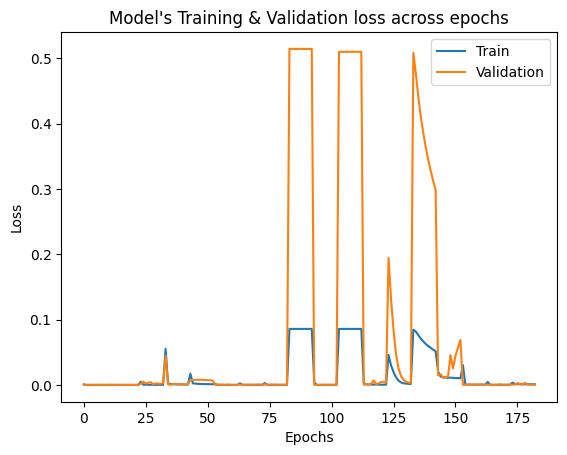

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


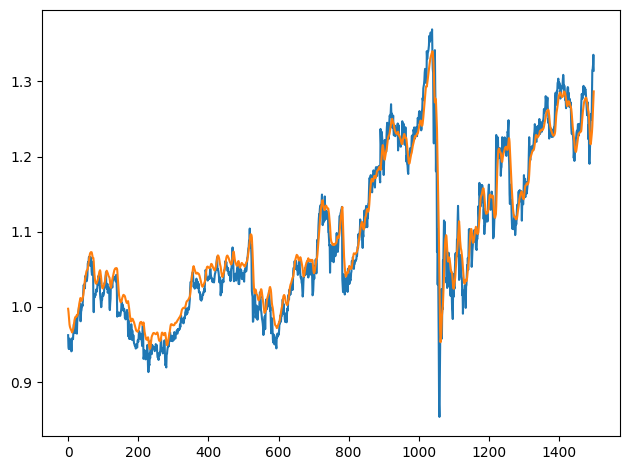

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [377]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
# regressorGRU.add(GRU(units=32,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=16,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L3 units 64, 32, 16 dropout, Adam 0.001', X_test, Y_test)

### Adamax

Epoch 1/200


165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0473 - val_loss: 2.5992e-04 - val_mean_absolute_error: 0.0124
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.2843e-04 - mean_absolute_error: 0.0068 - val_loss: 5.1273e-04 - val_mean_absolute_error: 0.0173
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.0474e-04 - mean_absolute_error: 0.0065 - val_loss: 3.4743e-04 - val_mean_absolute_error: 0.0139
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.2523e-04 - mean_absolute_error: 0.0071 - val_loss: 8.3089e-04 - val_mean_absolute_error: 0.0235
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.3787e-04 - mean_absolute_error: 0.0075 - val_loss: 3.6534e-04 - val_mean_absolute_error: 0.0156
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.0658e-04 - mean_absolute_error: 0.0071 - val_loss: 4.0174e-04 - val_mean_absolute_error: 0.0151
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step -

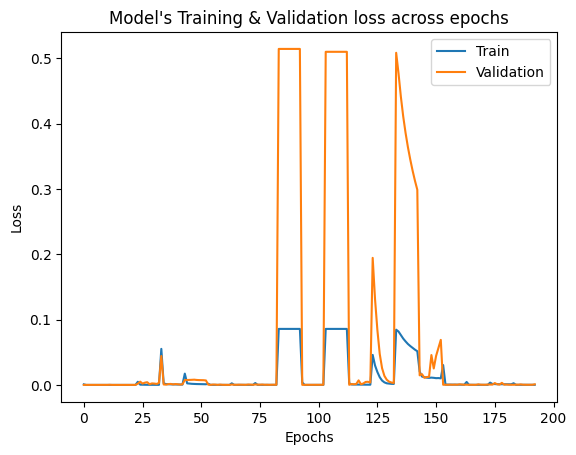

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


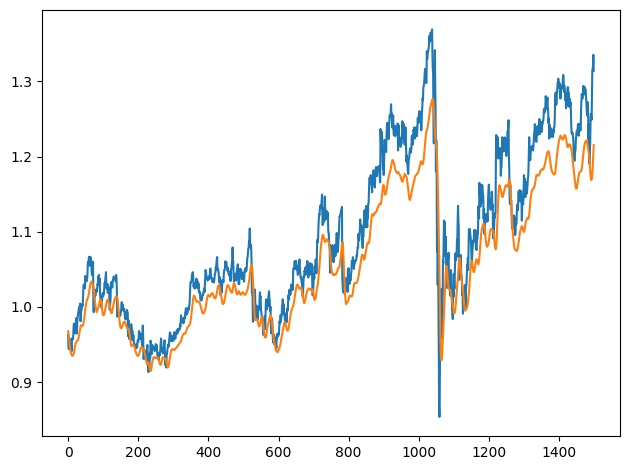

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [378]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adamax(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L 4 units 50, Adamax ', X_test, Y_test)

Epoch 1/200


330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0068 - mean_absolute_error: 0.0400 - val_loss: 1.8253e-04 - val_mean_absolute_error: 0.0103
Epoch 2/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0012 - mean_absolute_error: 0.0182 - val_loss: 3.8475e-04 - val_mean_absolute_error: 0.0168
Epoch 3/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0011 - mean_absolute_error: 0.0169 - val_loss: 1.5425e-04 - val_mean_absolute_error: 0.0092
Epoch 4/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 9.4724e-04 - mean_absolute_error: 0.0162 - val_loss: 1.3517e-04 - val_mean_absolute_error: 0.0086
Epoch 5/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 8.2444e-04 - mean_absolute_error: 0.0151 - val_loss: 3.7504e-04 - val_mean_absolute_error: 0.0158
Epoch 6/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 8.1509e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0015 - val_mean_absolute_error: 0.0355
Epoch 7/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.5033e-0

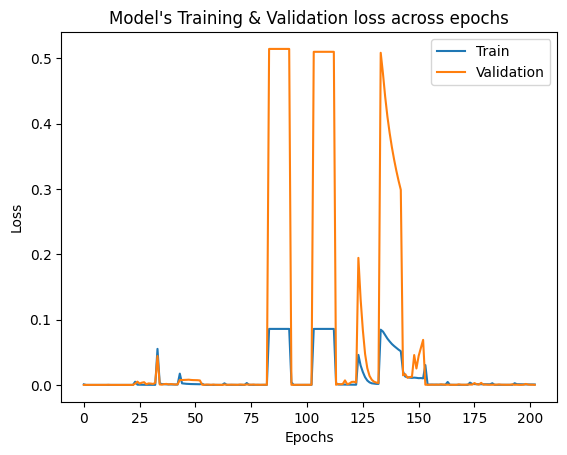

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


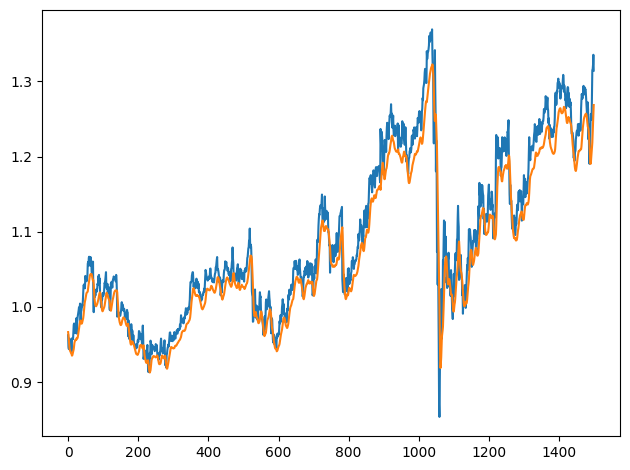

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [379]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adamax(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L3 units 64, 32 dropout, Adamax', X_test, Y_test)

### Adagrad

Epoch 1/200


330/330 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0854 - mean_absolute_error: 0.1634 - val_loss: 0.4935 - val_mean_absolute_error: 0.6742
Epoch 2/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0655 - mean_absolute_error: 0.1858 - val_loss: 0.2165 - val_mean_absolute_error: 0.4384
Epoch 3/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0383 - mean_absolute_error: 0.1589 - val_loss: 0.1317 - val_mean_absolute_error: 0.3419
Epoch 4/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0237 - mean_absolute_error: 0.1238 - val_loss: 0.0770 - val_mean_absolute_error: 0.2611
Epoch 5/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0134 - mean_absolute_error: 0.0905 - val_loss: 0.0409 - val_mean_absolute_error: 0.1898
Epoch 6/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0076 - mean_absolute_error: 0.0656 - val_loss: 0.0214 - val_mean_absolute_error: 0.1366
Epoch 7/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0043 - mean_absolute_error: 0.0455 - val

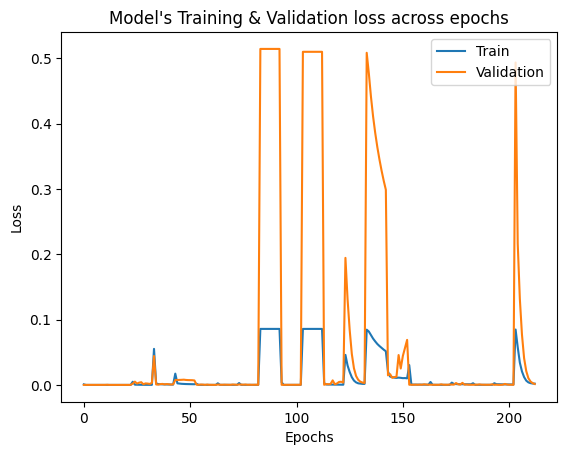

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


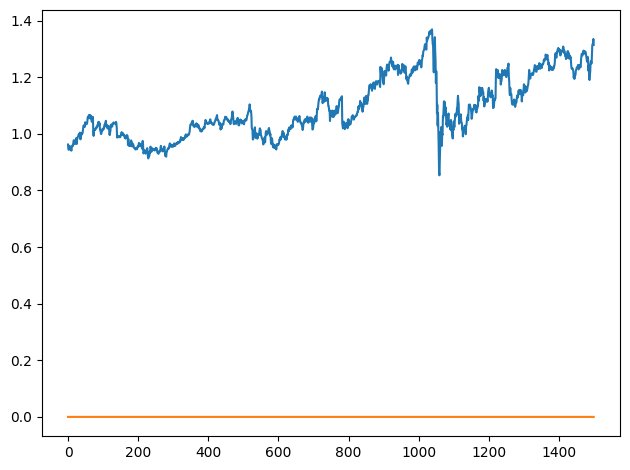

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [380]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adagrad(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L3 units 64, 32 dropout, Adagrad', X_test, Y_test)

### Adadelta

Epoch 1/200


330/330 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0775 - mean_absolute_error: 0.1559 - val_loss: 0.4617 - val_mean_absolute_error: 0.6555
Epoch 2/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0747 - mean_absolute_error: 0.1493 - val_loss: 0.4144 - val_mean_absolute_error: 0.6200
Epoch 3/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0653 - mean_absolute_error: 0.1409 - val_loss: 0.3671 - val_mean_absolute_error: 0.5826
Epoch 4/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0609 - mean_absolute_error: 0.1432 - val_loss: 0.3241 - val_mean_absolute_error: 0.5462
Epoch 5/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0509 - mean_absolute_error: 0.1360 - val_loss: 0.2854 - val_mean_absolute_error: 0.5115
Epoch 6/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0455 - mean_absolute_error: 0.1354 - val_loss: 0.2509 - val_mean_absolute_error: 0.4786
Epoch 7/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0405 - mean_absolute_error: 0.1334 -

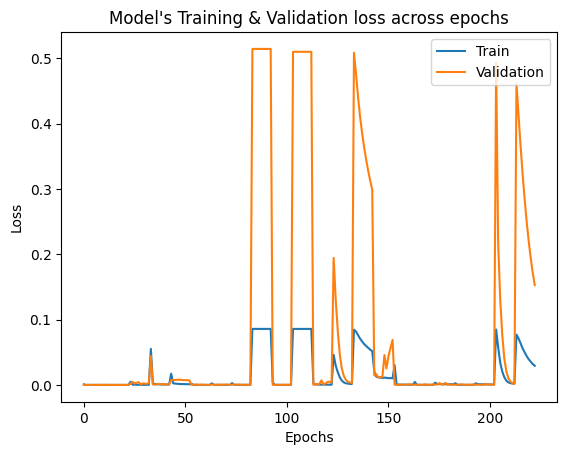

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


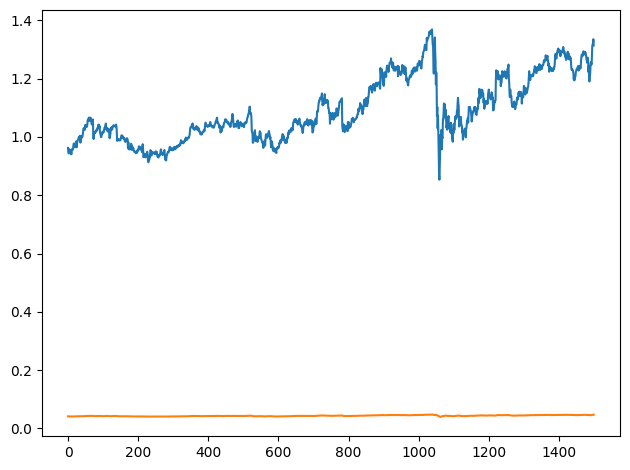

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [381]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=32,activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(Dense(units=1,activation='relu'))
regressorGRU.compile(optimizer=Adadelta(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

plotloss(history)

print_result(regressorGRU, 'GRU L3 units 64, 32 dropout, Adadelta', X_test, Y_test)

### SDG

In [382]:
# regressorGRU = Sequential()
# regressorGRU.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
# regressorGRU.add(Dropout(0.2)) #to prevent overfitting
# regressorGRU.add(GRU(units=32,activation='tanh'))
# regressorGRU.add(Dropout(0.2)) #to prevent overfitting
# regressorGRU.add(Dense(units=1,activation='relu'))
# regressorGRU.compile(optimizer=SGD(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
# regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])


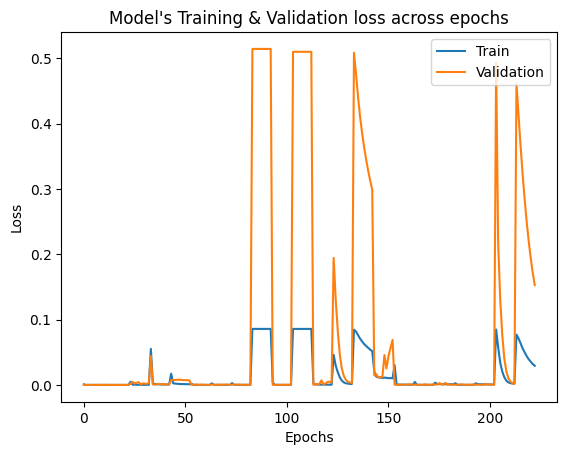

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


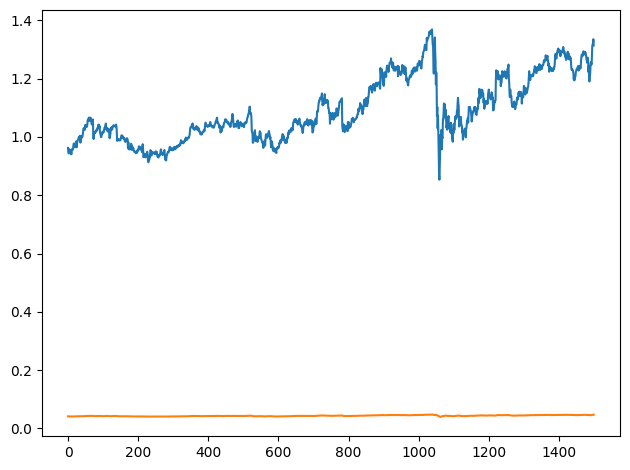

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [383]:

plotloss(history)

print_result(regressorGRU, 'GRU L2 units 64, 32 dropout, SGD', X_test, Y_test)

### Convolution

Epoch 1/200


330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0554 - val_loss: 0.0014
Epoch 2/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0011 - val_loss: 7.8316e-04
Epoch 3/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011 - val_loss: 8.6019e-04
Epoch 4/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.2450e-04 - val_loss: 8.3464e-04
Epoch 5/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.1623e-04 - val_loss: 0.0011
Epoch 6/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.4172e-04 - val_loss: 7.1948e-04
Epoch 7/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.7278e-04 - val_loss: 5.8588e-04
Epoch 8/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.3578e-04 - val_loss: 0.0018
Epoch 9/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.1462e-04 - val_loss: 0.0014
Epoch 10/200
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.3015e-04 - val_loss: 6.4364e-04


Model: "sequential_129"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_132 (Dropout)           │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_91 (GRU)                    │ (None, 1, 64)          │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_92 (GRU)                    │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_238 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,973 (406.15 KB)

 Trainable params: 34,657 (135.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,316 (270.77 KB)

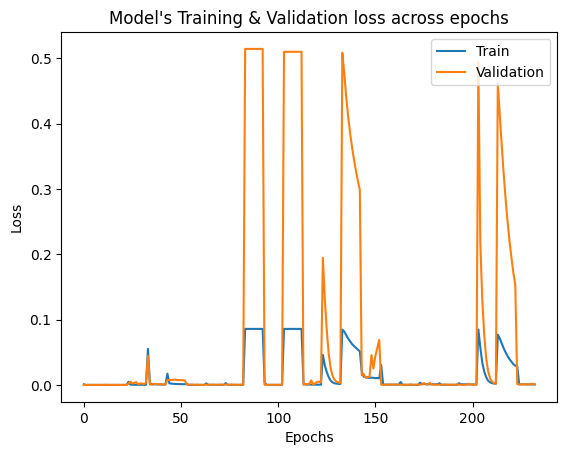

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


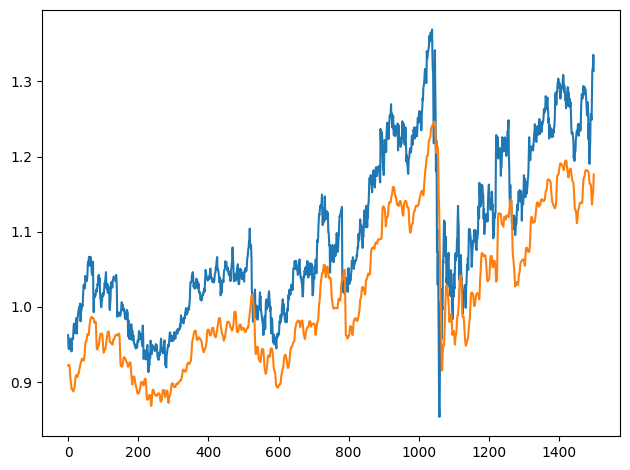

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [384]:

model_conv = Sequential()
model_conv.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_conv.add(MaxPooling1D(pool_size=5))
model_conv.add(Dropout(0.2))
model_conv.add(GRU(units=64,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
model_conv.add(GRU(units=32,activation='tanh'))
model_conv.add(Dense(1))

model_conv.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model_conv.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=32, callbacks=[history, early_stopping])

model_conv.summary()

plotloss(history)
print_result(model_conv, 'Conv GRU 2 layers 64,32, dropout  Adam', X_test, Y_test)

# Result

In [385]:
results

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


# drugi nacin

In [386]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [387]:
data

,Close
Date,
1962-01-02,0.263021
1962-01-03,0.257161
1962-01-04,0.259115
1962-01-05,0.253255
1962-01-08,0.250651
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [388]:
data2 = data.copy()
data2

,Close
Date,
1962-01-02,0.263021
1962-01-03,0.257161
1962-01-04,0.259115
1962-01-05,0.253255
1962-01-08,0.250651
...,...
2021-12-13,57.759998
2021-12-14,57.799999
2021-12-15,58.060001


In [389]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(data, 
                                '1962-01-05', 
                                '2021-12-17', 
                                n=3)

windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1962-01-05,0.263021,0.257161,0.259115,0.253255
1,1962-01-08,0.257161,0.259115,0.253255,0.250651
2,1962-01-09,0.259115,0.253255,0.250651,0.255208
3,1962-01-10,0.253255,0.250651,0.255208,0.256510
4,1962-01-11,0.250651,0.255208,0.256510,0.259115
...,...,...,...,...,...
15088,2021-12-13,55.000000,54.860001,56.279999,57.759998
15089,2021-12-14,54.860001,56.279999,57.759998,57.799999
15090,2021-12-15,56.279999,57.759998,57.799999,58.060001
15091,2021-12-16,57.759998,57.799999,58.060001,58.650002


## Priprema podataka

In [390]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((15093,), (15093, 3, 1), (15093,))

In [391]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train_1, y_train_1 = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val_1, y_val_1 = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test_1, y_test_1 = dates[q_90:], X[q_90:], y[q_90:]

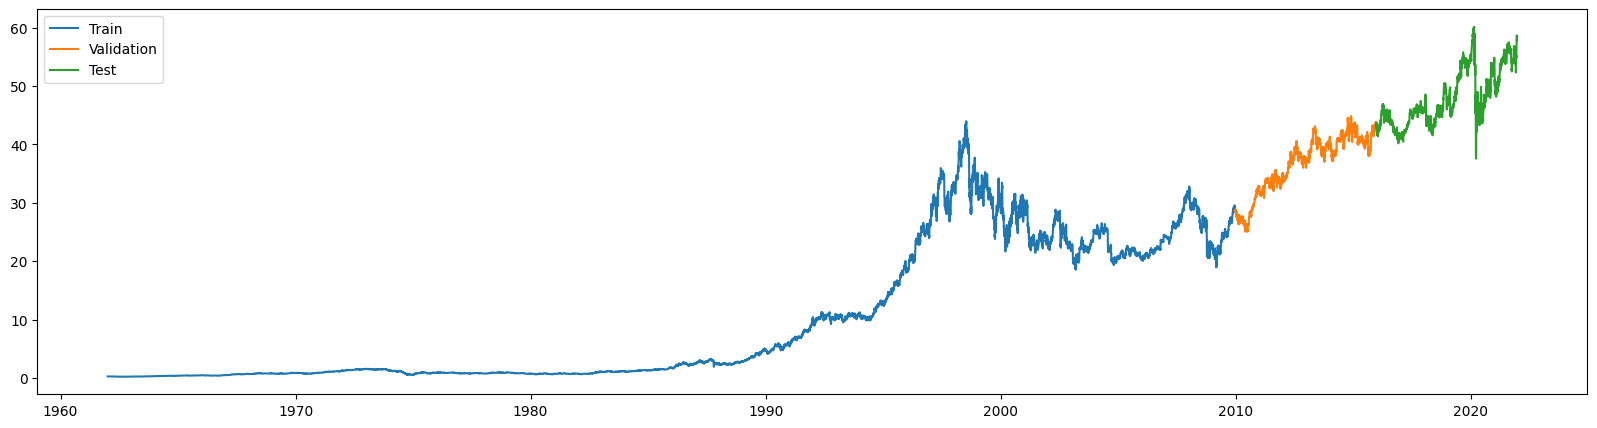

In [392]:
plt.figure(figsize=(20,5))
plt.plot(dates_train, y_train_1)
plt.plot(dates_val, y_val_1)
plt.plot(dates_test, y_test_1)

plt.legend(['Train', 'Validation', 'Test'])

## LSTM

### Adam

#### simple lstm

In [393]:

model = Sequential([Input((3, 1)),
                    LSTM(64),
                    Dense(32, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )

model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 76.8087 - mean_absolute_error: 3.9465 - val_loss: 0.8149 - val_mean_absolute_error: 0.6130
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0906 - mean_absolute_error: 0.1522 - val_loss: 0.2714 - val_mean_absolute_error: 0.3860
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0905 - mean_absolute_error: 0.1481 - val_loss: 0.2098 - val_mean_absolute_error: 0.3414
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0822 - mean_absolute_error: 0.1429 - val_loss: 0.2512 - val_mean_absolute_error: 0.3808
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0802 - mean_absolute_error: 0.1399 - val_loss: 0.1623 - val_mean_absolute_error: 0.2962
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0874 - mean_absolute_error: 0.1458 - val_loss: 0.7540 - val_mean_absolute_error: 0.7777
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0898 - mean_absolute_error: 0.1488 - val_loss: 0

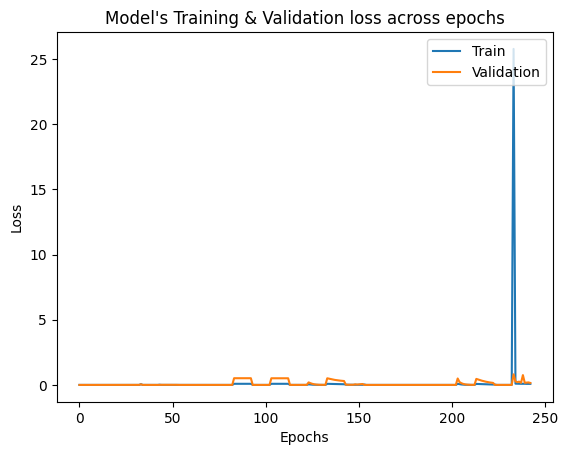

28/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


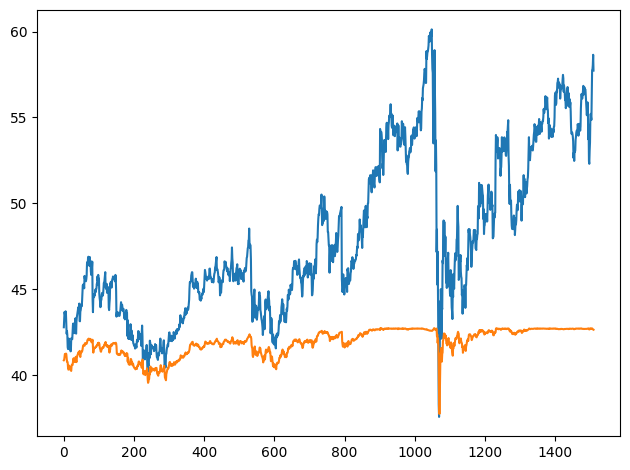

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [394]:
plotloss(history)
print_result(model, 'Data 2, LSTM 64', X_test_1, y_test_1)

#### GRU 128,64

Model: "sequential_131"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_93 (GRU)                    │ (None, 3, 128)         │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_94 (GRU)                    │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_244 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_245 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_246 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,465 (369.00 KB)

 Trainable params: 94,465 (369.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 67.2484 - mean_absolute_error: 3.5068 - val_loss: 0.7044 - val_mean_absolute_error: 0.5987
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0973 - mean_absolute_error: 0.1711 - val_loss: 0.2179 - val_mean_absolute_error: 0.3237
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1044 - mean_absolute_error: 0.1695 - val_loss: 0.2432 - val_mean_absolute_error: 0.3365
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0960 - mean_absolute_error: 0.1590 - val_loss: 0.1988 - val_mean_absolute_error: 0.3282
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1053 - mean_absolute_error: 0.1747 - val_loss: 0.3331 - val_mean_absolute_error: 0.4270
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1039 - mean_absolute_error: 0.1731 - val_loss: 0.1937 - val_mean_absolute_error: 0.3375
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1032 - mean_absolute_error: 0.1683 - val_loss:

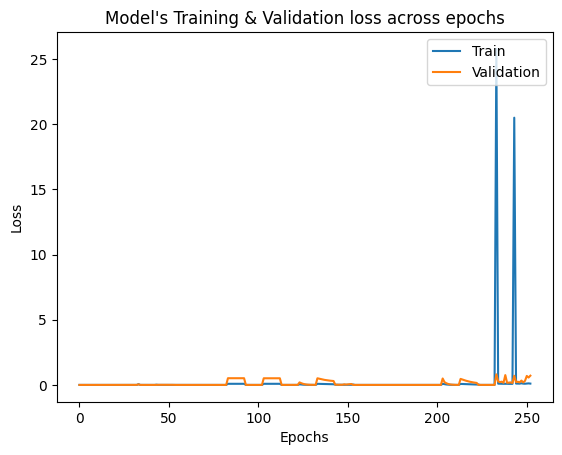

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


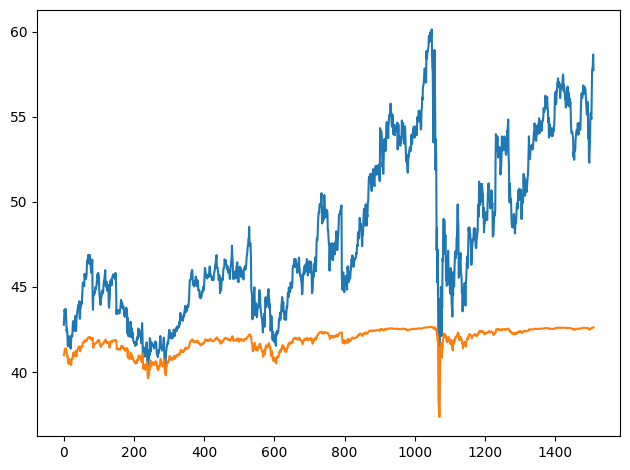

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [395]:
model = Sequential([
    Input(shape=(3, 1)),
    GRU(128, return_sequences=True),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])
plotloss(history)
print_result(model, 'Data 2 GRU 128,64', X_test_1, y_test_1)

#### LSTM Bidirectional

Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional) │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_247 (Dense)               │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_248 (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_249 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_250 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,753 (588.88 KB)

 Trainable params: 150,753 (588.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 68.5673 - mean_absolute_error: 3.5532 - val_loss: 1.4313 - val_mean_absolute_error: 0.9481
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1236 - mean_absolute_error: 0.1727 - val_loss: 0.3423 - val_mean_absolute_error: 0.4655
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1312 - mean_absolute_error: 0.1811 - val_loss: 0.3192 - val_mean_absolute_error: 0.4332
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1173 - mean_absolute_error: 0.1732 - val_loss: 0.3303 - val_mean_absolute_error: 0.4525
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0918 - mean_absolute_error: 0.1504 - val_loss: 1.2979 - val_mean_absolute_error: 1.0196
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1002 - mean_absolute_error: 0.1579 - val_loss: 0.2356 - val_mean_absolute_error: 0.3559
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0906 - mean_absolute_error: 0.1467 - val_loss: 0

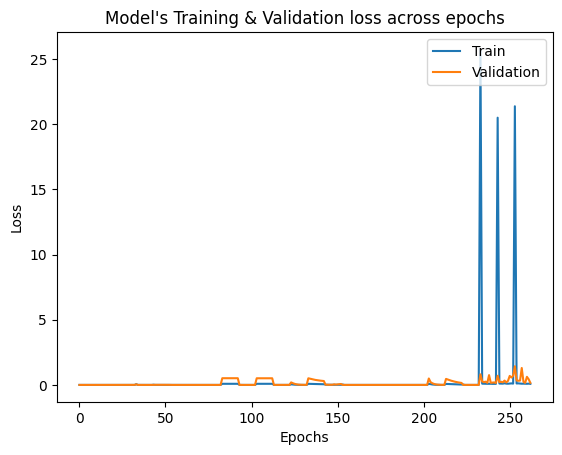

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


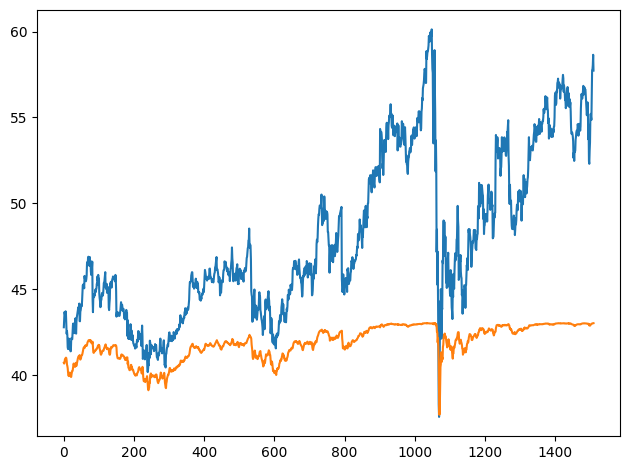

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [396]:
from keras.layers import  Bidirectional

model = Sequential([
    Input(shape=(3, 1)),
    Bidirectional(LSTM(128)),
    Dense(64, activation='relu'),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])
plotloss(history)
print_result(model, 'Data 2 Bidirectional LSTM 128', X_test_1, y_test_1)

#### LSTM 128, b64, Dropout

In [397]:
model = Sequential([
    Input(shape=(3, 1)),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=['mean_absolute_error'])
model.summary()
history = model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])

Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_149 (LSTM)                 │ (None, 3, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_133 (Dropout)           │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_150 (LSTM)                 │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_251 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_252 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_253 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_254 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_255 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,881 (480.00 KB)

 Trainable params: 122,881 (480.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 51.7276 - mean_absolute_error: 3.0409 - val_loss: 1.3134 - val_mean_absolute_error: 0.8097
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3022 - mean_absolute_error: 0.2903 - val_loss: 0.2732 - val_mean_absolute_error: 0.3684
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2260 - mean_absolute_error: 0.2609 - val_loss: 0.3301 - val_mean_absolute_error: 0.4222
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.2250 - mean_absolute_error: 0.2577 - val_loss: 0.4322 - val_mean_absolute_error: 0.5465
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2127 - mean_absolute_error: 0.2508 - val_loss: 0.3251 - val_mean_absolute_error: 0.4118
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1705 - mean_absolute_error: 0.2257 - val_loss: 0.9215 - val_mean_absolute_error: 0.8594
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1936 - mean_absolute_error: 0.2429 - val_

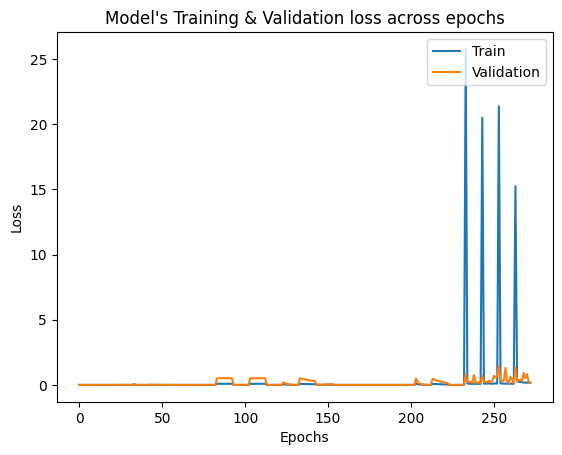

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


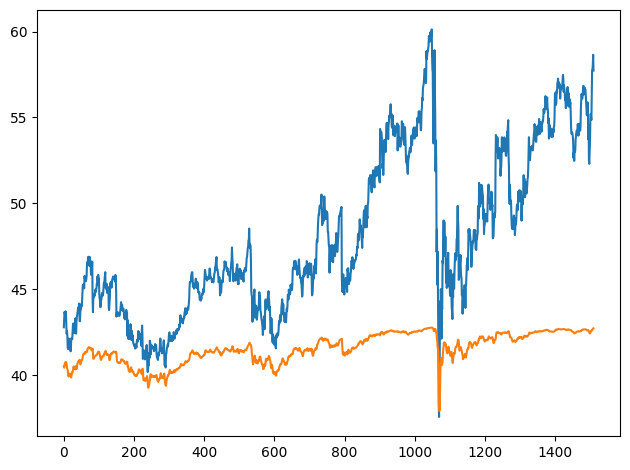

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [398]:
plotloss(history)
print_result(model, 'Data 2 LSTM 128 D0, LSTM 16', X_test_1, y_test_1)

#### 2 layers, 32, 16 units and dropout

In [399]:


regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(50, return_sequences = True,  input_shape = (X_train_1.shape[1],X_train_1.shape[2])))

regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))


regressorLSTM.add   (Dense(64, activation='relu')),
regressorLSTM.add  (Dense(32, activation='relu')),
regressorLSTM.add ( Dense(16, activation="relu"),)
regressorLSTM.add ( Dense(8, activation="relu")),
# regressorLSTM.add ( Dense(1, activation='linear'))

regressorLSTM.add(Dense(1,activation="relu"))



regressorLSTM.compile(loss='mse',  optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'] )
regressorLSTM.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50,  callbacks=[history, early_stopping])


Epoch 1/50


378/378 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 83.3288 - mean_absolute_error: 4.6450 - val_loss: 7.3715 - val_mean_absolute_error: 2.1832
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.7819 - mean_absolute_error: 0.4853 - val_loss: 1.7696 - val_mean_absolute_error: 1.1876
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.4700 - mean_absolute_error: 0.4005 - val_loss: 1.2115 - val_mean_absolute_error: 0.9423
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.4211 - mean_absolute_error: 0.3802 - val_loss: 0.5920 - val_mean_absolute_error: 0.6266
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2706 - mean_absolute_error: 0.3063 - val_loss: 0.3333 - val_mean_absolute_error: 0.4411
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3990 - mean_absolute_error: 0.3783 - val_loss: 2.3246 - val_mean_absolute_error: 1.3850
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2856 - mean_absolute_error: 0.3140 - val

In [400]:
regressorLSTM.summary()


Model: "sequential_134"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_151 (LSTM)                 │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_134 (Dropout)           │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_152 (LSTM)                 │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_153 (LSTM)                 │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_154 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_257 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_258 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_259 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_260 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,053 (902.55 KB)

 Trainable params: 77,017 (300.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 154,036 (601.71 KB)

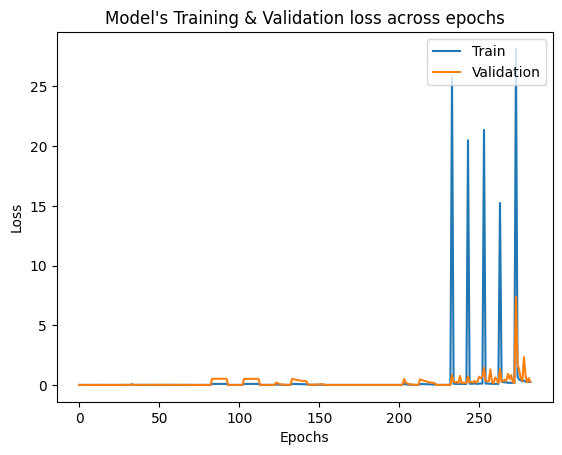

39/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


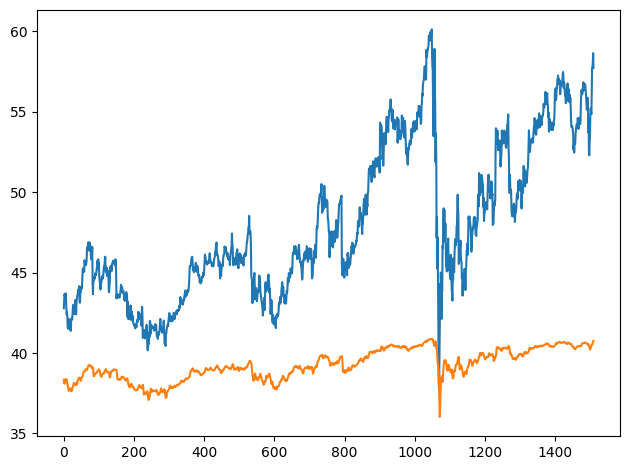

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
1,"SimpleRNN 4 units 50, Dropout, Adam 0.001",0.180954,-2.402121,0.039794
2,Conv RNN 20 dropout Adam,0.372862,-11.120195,0.141767
3,"SimpleRNN 4 units 50, Dropout, SGD 0.001",0.287544,-6.840384,0.091707
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
5,"LSTM 2 units 64,32 Adam 0.001",0.087861,0.188610,0.009491
6,"LSTM 32, 16, Adam 0.001",0.103112,-0.126327,0.013174
7,LSTM 4 layers 50 units dropout,1.091582,-101.870182,1.203249
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
9,"LSTM 64, 32 Adamax",1.091582,-101.870182,1.203249


In [401]:

plotloss(history)
print_result(regressorLSTM, 'Data 2 LSTM 32 D0,2 LSTM 16', X_test_1, y_test_1)



# result

In [402]:
results.sort_values(by='mean sqrd')

,Model,mean abs,R2,mean sqrd
0,"SimpleRNN 20 units, Adam",0.009332,0.983257,0.000196
16,"GRU L3 units 64, 32, 16 dropout, Adam 0.001",0.017267,0.949040,0.000596
4,"LSTM 64, Adam 0.001",0.017963,0.942020,0.000678
10,"LSTM 2 laters 50, dropout Adamax",0.018449,0.931717,0.000799
18,"GRU L3 units 64, 32 dropout, Adamax",0.024107,0.925108,0.000876
8,"LSTM 64, Dense 2 25,1, Adamax",0.023043,0.918523,0.000953
14,"Conv LSTM 2 layers 32,26, dropout Adam",0.022917,0.910928,0.001042
13,"LSTM 2 laters 50, dropout Adamax custom loss",0.029459,0.882390,0.001376
17,"GRU L 4 units 50, Adamax",0.038039,0.820550,0.002099
15,"GRU L 4 units 50, Adam 0.001",0.055510,0.655968,0.004024


DODATI:
- custom loss funkcija i jos neki loss mozda isto
- Conv - ovo istraziti
- ispitati gde sve dodati dropout i izbaciti visak
- mozda za GRU jos neka kombinacija layera